# Understanding Inflation and Central Bank Policy Choices

In [1]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import json

# Quick display functions
from IPython.display import display, Markdown, Latex, HTML, Math

# Define the matplot colormap for plots
plt.style.use('seaborn-poster') # Someday this will match CORE stylesheet (But not today)

# Define the CORE style for the whole simulator (Do not touch much)
### Try to avoid specifying things in the widgets although that will not always be possible
display(widgets.HTML('''
    <style>
            .widget-label { min-width: min-content !important; }

            /****************/
            /* CORE Styling */
            /****************/
            body{
                margin: 0;
                padding: 0;
                color: #222;
                font-size: 15px;
            }

            #rendered_cells {
                max-width: 60em;
                margin: 0 auto;
            }
            
            .jp-RenderedHTMLCommon {
                color: #222;
                font-family: "Amiri",serif;
                font-size: 1.4em;
                line-height: 1.5em;
            }

            /* Labels of the interactive parts  */
            .widget-label-basic,
            .widget-html > .widget-html-content, 
            .jupyter-widget-label-basic {
                color: #222;
                font-family: "Amiri",serif;
                font-size: 1.4em;
                line-height: 1.5em;
            
            }

            
            /* Center images within cells */
            .jp-RenderedHTMLCommon img, 
            .jp-RenderedImage img, 
            .jp-RenderedHTMLCommon svg, 
            .jp-RenderedSVG svg {
                display: block;
                margin: auto;
            }


            .jp-RenderedHTMLCommon h1, 
            .jp-RenderedHTMLCommon h2, 
            .jp-RenderedHTMLCommon h3 {
                font-family: "Source Sans Pro",sans-serif;
                color: #f05a5b; 
                font-weight: bold;
            }
            
            .jp-RenderedHTMLCommon p {
                display: block;
                margin-block-start: 1em;
                margin-block-end: 1em;
                margin-inline-start: 0px;
                margin-inline-end: 0px;
                margin-bottom: 1.5em;
            }

            .core-exercise{
                border: 0.2em solid #f05a5b;
                border-bottom-right-radius: 2em;
                font-size: .882em;
                line-height: 1.5em;
                margin: 1.5em 0;
                padding: .75em;
                clear: both
            }

            .core-question{
                font-family: "Source Sans Pro",sans-serif;
                font-size: .882em;
                line-height: 1.5em;
                background-color: #FCF9F9;
                background-color: rgba(240,90,91,0.15);
                border-bottom-right-radius: 2em;
                page-break-inside: avoid;
                padding: .75em;
                margin: 1.5em 0;
            }

            /* We need to change these names but it is hard to do, so we will have to use the Danger label */
            .jupyter-button.mod-danger{
                font-family: "Source Sans Pro",sans-serif;
                font-size: 110%;
                line-height: 1.5em;
                background-color: #f05a5b;
                color: white;
                border: 0;
                border-radius: .1rem;
            }    

            .p-Widget, .lm-Widget
    </style>
'''))

# Define auxiliary objects to help styling the widgets
stretching_box = widgets.Box(layout=widgets.Layout(flex='1 1 auto')) # This box stretches to fill all the remaining space in the container


HTML(value='\n    <style>\n            .widget-label { min-width: min-content !important; }\n\n            /**…

October 2022: The job of central banks in recent years is like riding a rollercoaster. After having to fight with deflationary forces arising from the financial crisis in the late 2000’s and from the 2020-2021 COVID-19 pandemic, inflation became the number one public enemy during 2022. Several shocks that range from the disruption in global production supply chains to increasing commodity prices due to the Ukraine war have increased consumer price (CPI) inflation to levels incompatible with central banks’ mandate of price stability (see Figure 1). The frequent headlines of the ‘cost of living crisis’ refer to the fact that workers were not on average receiving nominal wage rises to compensate them for the rising inflation.

![](extras/intrograph.jpg)
<p style='text-align: center'>Figure 1: Consumer price inflation in the EU 2009-2021. Source: Eurostat </p>

Central bankers may yearn for past too-low inflation scenarios where, if successful, monetary policy could help the economy avoid or escape a deflation trap and produce both price stability and lower unemployment. Instead, when negative supply shocks - like an oil shock - hit the economy central bankers face a nasty trade-off between price stability and unemployment, at least in the short run. Bringing inflation down to hit the central bank’s target in the short run is technically possible but, is it worth the economic downturn and the increase in unemployment that this would entail? Most central banks consider that it is not since they take the inflation target as a medium run goal. Within this time frame central banks face two uncertainties that condition their decision.
* First, how persistent are the underlying shocks and/or may there be in the near future counterbalancing disinflationary shocks?
* Second, how anchored are inflation expectations to the central bank’s inflation target and how serious is the danger of second round effects?
A tight disinflationary policy could produce needless suffering if the underlying inflationary forces dissipate in the near future. However, a too timid response of monetary policy to inflation may trigger de-anchoring and second round effects that would push inflation further away from the target.



This interactive simulation can help you to understand some of the monetary policy dilemmas faced by central banks in the wake of the pandemic and the war in Ukraine explained above.
* All the sections share the common feature of representing an economy hit by an inflationary supply shock (think of an oil price shock).
* First, as a benchmark, the consequences of the shock for inflation are  shown assuming that monetary policy is passive and that expected inflation is equal to last period’s inflation, i.e.inflation expectations are not anchored to the central bank’s inflation target. . 
* In the second section you take charge of monetary policy and use your interest rate choice to  change the consequences of the shock for the first period after the shock. Here you will experience the short run trade-off implied in this monetary policy decision. 
* In the third section you can compare the no-policy reaction benchmark with two alternative monetary policy paths: an active but too timid monetary policy and one that succeeds in reducing inflation. . 
* In the fourth section you can put yourself in the skin of central banks with different degrees of inflation aversion to see that optimal monetary policy is compatible with different degrees of tightening. 
* Finally, the last section introduces inflation anchoring for the first time. It reveals why anchoring inflation expectations is so important to central banks because it allows monetary policy to bring inflation back to the target quicker and with lower unemployment costs.


In [2]:
# Default values of the simulator in the Excel
shock_size = -0.03 
no_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 100, 8, 5, 4, 1, 101, 0.04761904761904767], [7, 97, 0.07619047619047614, 100, 11, 8, 4, 1, 101, 0.04761904761904767], [8, 97, 0.07619047619047614, 100, 14, 11, 4, 1, 101, 0.04761904761904767], [9, 97, 0.07619047619047614, 100, 17, 14, 4, 1, 101, 0.04761904761904767], [10, 97, 0.07619047619047614, 100, 20, 17, 4, 1, 101, 0.04761904761904767], [11, 97, 0.07619047619047614, 100, 23, 20, 4, 1, 101, 0.04761904761904767], [12, 97, 0.07619047619047614, 100, 26, 23, 4, 1, 101, 0.04761904761904767], [13, 97, 0.07619047619047614, 100, 29, 26, 4, 1, 101, 0.04761904761904767], [14, 97, 0.07619047619047614, 100, 32, 29, 4, 1, 101, 0.04761904761904767], [15, 97, 0.07619047619047614, 100, 35, 32, 4, 1, 101, 0.04761904761904767], [16, 97, 0.07619047619047614, 100, 38, 35, 4, 1, 101, 0.04761904761904767], [17, 97, 0.07619047619047614, 100, 41, 38, 4, 1, 101, 0.04761904761904767], [18, 97, 0.07619047619047614, 100, 44, 41, 4, 1, 101, 0.04761904761904767], [19, 97, 0.07619047619047614, 100, 47, 44, 4, 1, 101, 0.04761904761904767], [20, 97, 0.07619047619047614, 100, 50, 47, 4, 1, 101, 0.04761904761904767], [21, 97, 0.07619047619047614, 100, 53, 50, 4, 1, 101, 0.04761904761904767], [22, 97, 0.07619047619047614, 100, 56, 53, 4, 1, 101, 0.04761904761904767], [23, 97, 0.07619047619047614, 100, 59, 56, 4, 1, 101, 0.04761904761904767], [24, 97, 0.07619047619047614, 100, 62, 59, 4, 1, 101, 0.04761904761904767], [25, 97, 0.07619047619047614, 100, 65, 62, 4, 1, 101, 0.04761904761904767], [26, 97, 0.07619047619047614, 100, 68, 65, 4, 1, 101, 0.04761904761904767], [27, 97, 0.07619047619047614, 100, 71, 68, 4, 1, 101, 0.04761904761904767], [28, 97, 0.07619047619047614, 100, 74, 71, 4, 1, 101, 0.04761904761904767], [29, 97, 0.07619047619047614, 100, 77, 74, 4, 1, 101, 0.04761904761904767]]'
no_policy = json.loads(no_policy)

before_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767]]'
before_policy = json.loads(before_policy)

after_policies =  '''{
                    "1": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], 
                    "2": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 2, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 99, 7, 5, 4.0, 1, 101, 0.05714285714285716]], 
                    "3": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 3, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 98, 6, 5, 4.0, 1, 101, 0.06666666666666665]], 
                    "4": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 97, 5, 5, 4.0, 1, 101, 0.07619047619047614]], 
                    "5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 5, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 96, 4, 5, 4.0, 1, 101, 0.08571428571428574]], 
                    "6": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 6, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95, 3, 5, 4.0, 1, 101, 0.09523809523809523]], 
                    "7": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 7, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94, 2, 5, 4.0, 1, 101, 0.10476190476190472]]
                }'''
after_policies = json.loads(after_policies)

In [3]:
def PlotStuff(exceloutputs:list, title, after = False, show=True, auto=False, legend=False, shockline=True, shocktext=False, recoverytext=False):
    '''Plots inflation and unemployment on side-by-side subplots'''
    colourlist = ['#f05a5b', 'grey', 'pink']
    figs, axs = plt.subplots(1, 4, figsize=[24, 8])
    for data in exceloutputs:
        colour = colourlist[exceloutputs.index(data)]
        if after:
            axs[0].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][4] for i in range(1, len(data)-1)], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][3] for i in range(1, len(data)-1)], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data)-1)], [100*data[i][-1] for i in range(1, len(data)-1)], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-2)], [data[i][-3] for i in range(1, len(data)-2)], colour)
            axs[0].plot([data[-2][0], data[-1][0]], [data[-2][4], data[-1][4]], 'black')
            axs[1].plot([data[-2][0], data[-1][0]], [data[-2][3], data[-1][3]], 'black')
            axs[2].plot([data[-2][0], data[-1][0]], [100*data[-2][-1], 100*data[-1][-1]], 'black')
            axs[3].plot([data[-3][0], data[-2][0]], [data[-3][-3], data[-2][-3]], 'black')
            axs[3].set_xlim(left=0.75, right=6.25)

        else:
            axs[0].plot([data[i][0] for i in range(1, len(data))], [data[i][4] for i in range(1, len(data))], colour)
            axs[1].plot([data[i][0] for i in range(1, len(data))], [data[i][3] for i in range(1, len(data))], colour)
            axs[2].plot([data[i][0] for i in range(1, len(data))], [100*data[i][-1] for i in range(1, len(data))], colour)
            axs[3].plot([data[i][0] for i in range(1, len(data)-1)], [data[i][-3] for i in range(1, len(data)-1)], colour)
            axs[0].plot(data[-1][0] + 1, data[-1][4])
            axs[1].plot(data[-1][0] + 1, data[-1][3])
            axs[2].plot(data[-1][0] + 1, 100*data[-1][-1])
            axs[3].plot(data[-1][0] + 1, data[-1][-3])
    axs[0].set_title('Inflation %')
    axs[1].set_title('GDP')
    axs[2].set_title('Unemployment %')
    axs[3].set_title('Real Interest Rate %')
    axs[0].set_xlabel('Period')
    axs[1].set_xlabel('Period')
    axs[2].set_xlabel('Period')
    axs[3].set_xlabel('Period')
    if shockline:
        axs[0].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[1].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[2].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[3].vlines(x=4, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[0].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[1].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[2].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
        axs[3].vlines(x=5, ymin=0, ymax=200, color='silver', linestyles='dashed', label='shock')
    if shocktext:
        axs[0].text(x=3.85, y=8.16, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[1].text(x=3.85, y=100.675, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[2].text(x=3.85, y=11.175, s='SHOCK', rotation='vertical', horizontalalignment='center')
        axs[3].text(x=3.85, y=7.675, s='SHOCK', rotation='vertical', horizontalalignment='center')
    if recoverytext:
            axs[0].text(x=5.3, y=8.15, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[1].text(x=5.3, y=100.625, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[2].text(x=5.3, y=11.125, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')
            axs[3].text(x=5.3, y=7.625, s='POLICY\nREACTION', rotation='vertical', horizontalalignment='center')


    if not auto:
        axs[0].set_ylim(bottom=1.5, top=9)
        axs[1].set_ylim(bottom=93.5, top=101.5)
        axs[2].set_ylim(bottom=4, top=12)
        axs[3].set_ylim(bottom=0.5, top=8.5)


    figs.suptitle(title, fontsize=16)
    
    if legend:
        label1 = mlines.Line2D([], [], color='#f05a5b', label='Your Choice')
        label2 = mlines.Line2D([], [], color='grey', label='Benchmark')
        axs[0].legend(handles=[label1, label2], bbox_to_anchor=(0.8, 1.2))
        # axs[0].legend(handles=[label1, label2])

    if show:
        plt.show()
    else:
        return figs, axs

def AppendtoPlot(figs, axs, new_excel):
    axs[0].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][4] for i in range(1, len(new_excel))])
    axs[1].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][3] for i in range(1, len(new_excel))])
    axs[2].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-1] for i in range(1, len(new_excel))])
    axs[3].plot([new_excel[i][0] for i in range(1, len(new_excel))], [new_excel[i][-3] for i in range(1, len(new_excel))])
    return figs, axs

# The Supply Shock


When the price of imported energy and or commodities goes up, certain goods such as fuel or food become more expensive for the consumer. Costs of production go up as well and firms try to pass-through these higher costs to final prices. According to the model, firms are able to protect their profit margins by passing on these cost rises.These effects happen relatively quickly and concentrate in the first period, as shown in the figure below (Fig. 2). What happens in the following periods depends on policy. In the following sections you can explore different policy options and scenarios.

![](extras/supplyshockintrograph.jpg)
<p style='text-align: center'>Figure 2: Consumer Price Inflation rises from 2% to 5% following the oil shock</p>

## No Policy Reaction


If there is no policy response to the rise in inflation caused by the oil shock, the situation quickly spirals out of control as inflation rises period by period (Fig. 3)

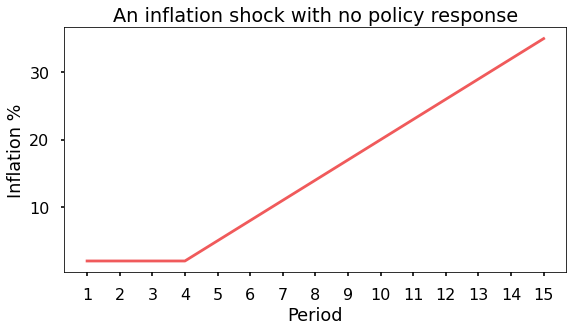

In [22]:
fig, ax = plt.subplots(1, 1, figsize = [9, 4.5])
ax.plot([no_policy[i][0] for i in range(1, 16)], [no_policy[i][4] for i in range(1, 16)], '#f05a5b')
ax.set_title('An inflation shock with no policy response')
ax.set_ylabel('Inflation %')
ax.set_xlabel('Period')
ax.xaxis.set_ticks(range(1, 16))

plt.show()

<p style='text-align: center'>Figure 3: The case of an oil price shock with no policy reaction - inflation rises period by period
</p>

When the price of oil increases, inflation goes up in the shock period due to the increase in the price of fuel for consumers and the pass-through of the increase in firms’ costs to final prices. This increase in inflation has two effects relevant for next period, assuming the economy was at equilibrium employment with inflation at target to begin with. 

* First, it reduces the purchasing power of workers, which means that workers’ real wages are below the level consistent with the state of the labour market. In the WS/PS model, the PS curve shifts down. This means that at the initial employment level, the real wage they get shown by the new lower PS curve, is below the real wage they need to be paid to show up and provide the required effort for the firm. 
* Second, the increase in inflation increases inflation expectations for the future. This is due to the assumption that expected inflation is equal to last period’s inflation. The Phillips Curve (PC)  shifts up.

Due to these two effects, in the next period, nominal wages increase faster both to offset the loss in purchasing power due to the unexpected increase in past inflation and to avoid erosion of purchasing power due to higher expected inflation. Wage setters are frustrated in the attempt to restore the real wage to its initial level, which was on the WS curve (and on the initial PS curve). Firms pass on the increase in unit labour costs arising from the rise in nominal wages to final prices to sustain their profit margin, increasing inflation above expected inflation. Therefore, in each period thereafter the attempt to restore workers’ purchasing power will maintain nominal wage growth and inflation above expected inflation, fueling an inflation spiral.

In [5]:
out = widgets.Output()
out.add_class('core-exercise')
display(out)

Output(_dom_classes=('core-exercise',))

In [6]:
policy_results = '{"1": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 100, 8, 5, 4, 1, 101, 0.04761904761904767]], "2": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "3": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "4": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "6": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]], "7": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 1, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 100, 8, 5, 4.0, 1, 101, 0.04761904761904767]]}'
policy_results = json.loads(policy_results)

r = widgets.IntSlider(      1, 1, 7, 
                            description='Post-shock Interest Rate', 
                            layout=widgets.Layout(flex='1 1 auto') # This stretches the slider to fill the space not used by the buttons
                        )

sub = widgets.Button(description='Submit', button_style='danger')
reset = widgets.Button(description='Reset')


with out:
    out.clear_output(wait=True)
    display(Markdown("### QUESTION: Monetary policy reaction to an Inflation shock"))
    display(Markdown("***There's been a permanent inflation shock in period 5***. Pretend you're the Central Bank - use the slider to choose a real interest rate for the next period to try and stabilise inflation, and note how your choice affects the rest of the economy too."))
    
    display( widgets.HBox((r, sub)) ) 
    print('') # empty line

    PlotStuff([before_policy], title='', shocktext=True, recoverytext=True, auto=False)
    display(Markdown('<p style=\'text-align: center\'>Figure 4</p>'))


def on_sub(b):
    chosenrate = r.value
    after_policy = policy_results[str(chosenrate)]
    with out:
        out.clear_output(wait=True)

        display(widgets.HBox((r, sub, reset)))
        display(Markdown(f'You chose a rate of {chosenrate}% - see below for its effects.'))
        PlotStuff([after_policies[str(chosenrate)]], title='', after=True, shocktext=True, recoverytext=True, auto=False)


        display(Markdown('<p style=\'text-align: center\'>Figure 4</p>'))
        if chosenrate == 4:
            display(Markdown('### You have stabilised inflation - congratulations.'))
            display(Markdown('This is because you have chosen an interest rate equal to the stabilizing real interest rate on the IS curve at the new lower equilibrium level of output. However, your success in stopping the inflation spiral has been at the expense of an increase in unemployment. Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage, although of lower magnitude than the erosion in real wage caused by the oil shock. Now the wage-setting real wage exactly matches the real wage consistent with firms\' price-setting behaviour and the higher oil price. Therefore, after your policy choice nominal wage growth and therefore actual inflation are equal to expected and past inflation. This is why inflation remains constant. The PC curve does not shift upward.'))
            display(Markdown('*You have stabilized inflation but unemployment is higher and inflation, although stable, is higher than the central bank\'s target, which we assume was the pre-existing rate of inflation.*'))
            print()
        elif chosenrate == 1:
            display(Markdown('### Inflation is still going up!'))
            display(Markdown('You have continued real interest rate at 1%, which is lower than the stabilizing rate. This hasn\'t stopped the inflation spiral or even slowed it down. Note that the stabilizing real interest rate has gone up because equilibrium output is lower after the shock (check the WS/PS diagram and indentify the \'bargaining gap\' between the WS and PS curves. '))
            display(Markdown('Although GDP and Unemployment are unchanged right now, in the long run the excessive inflation will damage them and the central bank is obligated to prevent this. The more inflation rises, the harder it is to control while keeping the economy stable.'))
            display(Markdown('Your policy choice has unfortunately caused inflation to get much worse. Aim to control it with more contractionary policy.'))
        elif 1 < chosenrate < 4:
            display(Markdown('### Inflation is still getting higher, and meanwhile unemployment is getting worse too! '))
            display(Markdown('This is because you have chosen an interest rate lower than the stabilizing level. Therefore, you have not stopped the inflation spiral, although it proceeds more slowly after your policy choice. Note that the stabilizing real interest rate has gone up because equilibrium output is lower after the shock (check the WS/PS diagram and identify the ‘bargaining gap’ between the WS and PS curves).'))
            display(Markdown('By increasing the interest rate, you have reduced aggregate demand. With lower demand for final goods and services, firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage, although of lower magnitude than the erosion in real wage caused by the oil shock. This is a move along the WS curve. Therefore, after the policy choice the wage-setting real wage is still higher than the real wage consistent with firms\' price-setting behaviour (i.e. the wage on the WS is still above that on the lower PS curve and a bargaining gap remains). Thus conditions in the labour market meant that wage setters still seek to increase the purchasing power of workers. Thus, they set nominal wage growth (and effectively, inflation) above expected and past inflation. This is why inflation is still on an upwards path, although a more moderate one due to the partial acceptance as a result of higher unemployment of the dent made in real wages by the shock.'))
            display(Markdown('*With your policy choice you have driven the economy to a stagflation scenario, that is, a situation that combines an increase in both inflation and unemployment.*'))
            print()
        elif 4 < chosenrate < 7:
            display(Markdown('### Inflation is heading back down to the central bank\'s target. This is because you have chosen an interest rate higher than the stabilizing level. However, employment is tanking due to your policy choice.'))
            display(Markdown('Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services, firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage. This effect is so strong that now the wage-setting real wage is lower than the real wage consistent with firms\' price-setting behaviour and the higher oil price (i.e. on the lower PS curve). The acceptance – due to the deterioration in the labour market – of further reductions in the real wage translates into setting nominal wage growth (and, in turn, inflation) below expected and past inflation. This is why inflation falls i.e. the PC shifts down.'))
            display(Markdown('*Despite your policy having reduced inflation, this is still higher than its pre-shock value. In the following periods you would need to keep the interest rate above its stabilizing level to drive inflation back to its pre-shock value (the central bank\'s target). The PC would keep shifting down period by period.*'))
            print()
        elif chosenrate == 7:
            display(Markdown('### You have chosen an interest rate higher than the new higher stabilizing (or equilibrium) level and enough to drive inflation back to its pre-shock value. However, the cost of your policy shock in terms of unemployment is the highest.'))
            display(Markdown('Increasing the interest rate you have reduced aggregate demand. With lower demand for final goods and services firms reduce labour demand, which increases unemployment. Higher unemployment reduces the workers\' reservation wage and makes wage setters accept a fall in the real wage. This effect is so strong that now the wage-setting real wage is lower than the real wage consistent with firms\' price-setting behaviour and the higher oil price. The acceptance – due to the deterioration in the labour market – of further reductions in the real wage translates into setting nominal wage growth (and, in turn, inflation) below expected and past inflation. This is why inflation falls and the PC shifts down.'))
            display(Markdown('*Since you have hit the pre-shock inflation value (the central bank\'s target), in the following period you would just need to adjust the interest rate to its equilibrium level. This is a \'shock therapy\' approach to the problem.*'))
            print()

def on_reset(b):
    with out:
        out.clear_output(wait=True)
        display(widgets.HBox((r, sub)))
        # display(before_policy)
        PlotStuff([before_policy], title='', shocktext=True, recoverytext=True, auto=False)
        display(Markdown('<p style=\'text-align: center\'>Figure 4</p>'))

sub.on_click(on_sub)
reset.on_click(on_reset)


### Test yourself
1. You can verify that choosing the appropriate interest rate, the central bank manages to bring inflation back to target. But could the central bank do even better, in terms of inflation? Discuss whether the central bank could avoid the increase of inflation in the shock period. Why or why not?
2. Answer the following questions:
   1. Choosing different values for the interest rate, try to gauge the sensitivity of GDP with respect to the interest rate and the slope coefficient for the Phillips curve (hint: both are integers).
   2. There is evidence that the Phillips curve has flattened during the lasts decades (see, for instance, <a href='https://www.ecb.europa.eu/press/key/date/2021/html/ecb.sp211007~ab617e7d60.en.html'>Prospects for inflation: sneezes and breezes (europa.eu)</a>). Discuss how the flattening of the Phillips curve may affect the cost of bringing inflation down after the supply shock.

## 2. Comparing different reactions by the Central Bank to an Oil Shock 


In response to an inflation shock, a Central Bank could have different approaches to recovery - each with their own costs and benefits over both short and long term.

Use Figure 5 to explore the whole path of the economy following different policy choices.Look first at the path of the real interest rate to see what the Central Bank does; then look at the outcomes for the economy.



In [7]:
no_change_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 100, 8, 5, 4, 1, 101, 0.04761904761904767], [7, 97, 0.07619047619047614, 100, 11, 8, 4, 1, 101, 0.04761904761904767], [8, 97, 0.07619047619047614, 100, 14, 11, 4, 1, 101, 0.04761904761904767], [9, 97, 0.07619047619047614, 100, 17, 14, 4, 1, 101, 0.04761904761904767], [10, 97, 0.07619047619047614, 100, 20, 17, 4, 1, 101, 0.04761904761904767], [11, 97, 0.07619047619047614, 100, 23, 20, 4, 1, 101, 0.04761904761904767], [12, 97, 0.07619047619047614, 100, 26, 23, 4, 1, 101, 0.04761904761904767], [13, 97, 0.07619047619047614, 100, 29, 26, 4, 1, 101, 0.04761904761904767], [14, 97, 0.07619047619047614, 100, 32, 29, 4, 1, 101, 0.04761904761904767], [15, 97, 0.07619047619047614, 100, 35, 32, 4, 1, 101, 0.04761904761904767], [16, 97, 0.07619047619047614, 100, 38, 35, 4, 1, 101, 0.04761904761904767], [17, 97, 0.07619047619047614, 100, 41, 38, 4, 1, 101, 0.04761904761904767], [18, 97, 0.07619047619047614, 100, 44, 41, 4, 1, 101, 0.04761904761904767], [19, 97, 0.07619047619047614, 100, 47, 44, 4, 1, 101, 0.04761904761904767], [20, 97, 0.07619047619047614, 100, 50, 47, 4, 1, 101, 0.04761904761904767], [21, 97, 0.07619047619047614, 100, 53, 50, 4, 1, 101, 0.04761904761904767], [22, 97, 0.07619047619047614, 100, 56, 53, 4, 1, 101, 0.04761904761904767], [23, 97, 0.07619047619047614, 100, 59, 56, 4, 1, 101, 0.04761904761904767], [24, 97, 0.07619047619047614, 100, 62, 59, 4, 1, 101, 0.04761904761904767], [25, 97, 0.07619047619047614, 100, 65, 62, 4, 1, 101, 0.04761904761904767], [26, 97, 0.07619047619047614, 100, 68, 65, 4, 1, 101, 0.04761904761904767], [27, 97, 0.07619047619047614, 100, 71, 68, 4, 1, 101, 0.04761904761904767], [28, 97, 0.07619047619047614, 100, 74, 71, 4, 1, 101, 0.04761904761904767], [29, 97, 0.07619047619047614, 100, 77, 74, 4, 1, 101, 0.04761904761904767]]'
no_change_policy = json.loads(no_change_policy)

timid_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 1, 2.5, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 98.5, 6.5, 5, 4, 1, 3.25, 101, 0.06190476190476191], [7, 97, 0.07619047619047614, 97.75, 7.25, 6.5, 4, 1, 3.625, 101, 0.06904761904761902], [8, 97, 0.07619047619047614, 97.375, 7.625, 7.25, 4, 1, 3.8125, 101, 0.07261904761904758], [9, 97, 0.07619047619047614, 97.1875, 7.8125, 7.625, 4, 1, 3.90625, 101, 0.07440476190476186], [10, 97, 0.07619047619047614, 97.09375, 7.90625, 7.8125, 4, 1, 3.953125, 101, 0.075297619047619], [11, 97, 0.07619047619047614, 97.046875, 7.953125, 7.90625, 4, 1, 3.9765625, 101, 0.07574404761904763], [12, 97, 0.07619047619047614, 97.0234375, 7.9765625, 7.953125, 4, 1, 3.98828125, 101, 0.07596726190476188], [13, 97, 0.07619047619047614, 97.01171875, 7.98828125, 7.9765625, 4, 1, 3.994140625, 101, 0.07607886904761907], [14, 97, 0.07619047619047614, 97.005859375, 7.994140625, 7.98828125, 4, 1, 3.9970703125, 101, 0.0761346726190476], [15, 97, 0.07619047619047614, 97.0029296875, 7.9970703125, 7.994140625, 4, 1, 3.99853515625, 101, 0.07616257440476193], [16, 97, 0.07619047619047614, 97.00146484375, 7.99853515625, 7.9970703125, 4, 1, 3.999267578125, 101, 0.07617652529761909], [17, 97, 0.07619047619047614, 97.000732421875, 7.999267578125, 7.99853515625, 4, 1, 3.9996337890625, 101, 0.07618350074404767], [18, 97, 0.07619047619047614, 97.0003662109375, 7.9996337890625, 7.999267578125, 4, 1, 3.99981689453125, 101, 0.0761869884672619], [19, 97, 0.07619047619047614, 97.00018310546875, 7.99981689453125, 7.9996337890625, 4, 1, 3.999908447265625, 101, 0.07618873232886902], [20, 97, 0.07619047619047614, 97.00009155273438, 7.999908447265625, 7.99981689453125, 4, 1, 3.9999542236328125, 101, 0.07618960425967258], [21, 97, 0.07619047619047614, 97.00004577636719, 7.9999542236328125, 7.999908447265625, 4, 1, 3.9999771118164062, 101, 0.07619004022507436], [22, 97, 0.07619047619047614, 97.0000228881836, 7.999977111816406, 7.9999542236328125, 4, 1, 3.999988555908203, 101, 0.07619025820777525], [23, 97, 0.07619047619047614, 97.0000114440918, 7.999988555908203, 7.999977111816406, 4, 1, 3.9999942779541016, 101, 0.07619036719912575], [24, 97, 0.07619047619047614, 97.0000057220459, 7.999994277954102, 7.999988555908203, 4, 1, 3.999997138977051, 101, 0.07619042169480095], [25, 97, 0.07619047619047614, 97.00000286102295, 7.999997138977051, 7.999994277954102, 4, 1, 3.9999985694885254, 101, 0.0761904489426386], [26, 97, 0.07619047619047614, 97.00000143051147, 7.999998569488525, 7.999997138977051, 4, 1, 3.9999992847442627, 101, 0.07619046256655737], [27, 97, 0.07619047619047614, 97.00000071525574, 7.999999284744263, 7.999998569488525, 4, 1, 3.9999996423721313, 101, 0.07619046937851681], [28, 97, 0.07619047619047614, 97.00000035762787, 7.999999642372131, 7.999999284744263, 4, 1, 3.9999998211860657, 101, 0.07619047278449653], [29, 97, 0.07619047619047614, 97.00000017881393, 7.999999821186066, 7.999999642372131, 4, 1, 3.999999910593033, 101, 0.07619047448748639]]'
timid_policy = json.loads(timid_policy)

optimal_policy = '[["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 4, 5.5, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 95.5, 3.5, 5, 4, 4, 4.75, 101, 0.09047619047619049], [7, 97, 0.07619047619047614, 96.25, 2.75, 3.5, 4, 4, 4.375, 101, 0.08333333333333337], [8, 97, 0.07619047619047614, 96.625, 2.375, 2.75, 4, 4, 4.1875, 101, 0.07976190476190481], [9, 97, 0.07619047619047614, 96.8125, 2.1875, 2.375, 4, 4, 4.09375, 101, 0.07797619047619042], [10, 97, 0.07619047619047614, 96.90625, 2.09375, 2.1875, 4, 4, 4.046875, 101, 0.07708333333333328], [11, 97, 0.07619047619047614, 96.953125, 2.046875, 2.09375, 4, 4, 4.0234375, 101, 0.07663690476190477], [12, 97, 0.07619047619047614, 96.9765625, 2.0234375, 2.046875, 4, 4, 4.01171875, 101, 0.07641369047619051], [13, 97, 0.07619047619047614, 96.98828125, 2.01171875, 2.0234375, 4, 4, 4.005859375, 101, 0.07630208333333333], [14, 97, 0.07619047619047614, 96.994140625, 2.005859375, 2.01171875, 4, 4, 4.0029296875, 101, 0.07624627976190479], [15, 97, 0.07619047619047614, 96.9970703125, 2.0029296875, 2.005859375, 4, 4, 4.00146484375, 101, 0.07621837797619047], [16, 97, 0.07619047619047614, 96.99853515625, 2.00146484375, 2.0029296875, 4, 4, 4.000732421875, 101, 0.0762044270833333], [17, 97, 0.07619047619047614, 96.999267578125, 2.000732421875, 2.00146484375, 4, 4, 4.0003662109375, 101, 0.07619745163690472], [18, 97, 0.07619047619047614, 96.9996337890625, 2.0003662109375, 2.000732421875, 4, 4, 4.00018310546875, 101, 0.07619396391369049], [19, 97, 0.07619047619047614, 96.99981689453125, 2.00018310546875, 2.0003662109375, 4, 4, 4.000091552734375, 101, 0.07619222005208337], [20, 97, 0.07619047619047614, 96.99990844726562, 2.000091552734375, 2.00018310546875, 4, 4, 4.0000457763671875, 101, 0.07619134812127981], [21, 97, 0.07619047619047614, 96.99995422363281, 2.0000457763671875, 2.000091552734375, 4, 4, 4.000022888183594, 101, 0.07619091215587792], [22, 97, 0.07619047619047614, 96.9999771118164, 2.0000228881835938, 2.0000457763671875, 4, 4, 4.000011444091797, 101, 0.07619069417317703], [23, 97, 0.07619047619047614, 96.9999885559082, 2.000011444091797, 2.0000228881835938, 4, 4, 4.000005722045898, 101, 0.07619058518182664], [24, 97, 0.07619047619047614, 96.9999942779541, 2.0000057220458984, 2.000011444091797, 4, 4, 4.000002861022949, 101, 0.07619053068615145], [25, 97, 0.07619047619047614, 96.99999713897705, 2.000002861022949, 2.0000057220458984, 4, 4, 4.000001430511475, 101, 0.0761905034383138], [26, 97, 0.07619047619047614, 96.99999856948853, 2.0000014305114746, 2.000002861022949, 4, 4, 4.000000715255737, 101, 0.07619048981439502], [27, 97, 0.07619047619047614, 96.99999928474426, 2.0000007152557373, 2.0000014305114746, 4, 4, 4.000000357627869, 101, 0.07619048300243558], [28, 97, 0.07619047619047614, 96.99999964237213, 2.0000003576278687, 2.0000007152557373, 4, 4, 4.000000178813934, 101, 0.07619047959645586], [29, 97, 0.07619047619047614, 96.99999982118607, 2.0000001788139343, 2.0000003576278687, 4, 4, 4.000000089406967, 101, 0.076190477893466]]'
optimal_policy = json.loads(optimal_policy)




In [8]:
out2 = widgets.Output()
out2.add_class('core-exercise')
display(out2)

Output(_dom_classes=('core-exercise',))

In [9]:
title = Markdown('### Comparing types of Central Banks')
dropdown = widgets.Dropdown(options=['Select an option from below', 'One that wants to avoid higher unemployment despite equilibrium change',
 'One that slowly accepts change to unemployment', 
 'One that accepts costly recession and unemployment below equilibrium to prioritise inflation'], value='Select an option from below', layout={'width': 'max-content'}, description='')

def get_plots(CB):
    if CB == 'One that wants to avoid higher unemployment despite equilibrium change':
        PlotStuff([no_change_policy[:15]], title='', after=False, auto=False)
        display(Markdown('<p style=\'text-align: center\'>Figure 5</p>'))
        display(Markdown('*Leaving policy unchanged is not sustainable*'))
        display(Markdown('As shown previously, an unchanged interest rate ensures an unsustainable inflation spiral.'))
    elif CB == 'One that slowly accepts change to unemployment':
        PlotStuff([timid_policy[:15]], title='',after=False)
        display(Markdown('<p style=\'text-align: center\'>Figure 5</p>'))
        display(Markdown('*A slow response has short term benefits with a soft landing, at the expense of permanently high inflation*'))
        display(Markdown('In this case, the central bank slowly adjusts from below the policy rate to its equilibrium level. The increases in the interest rate are not enough to drive inflation down since the interest rate is always below its stabilizing value. As a result, inflation keeps increasing. Eventually, inflation stabilizes at a level above its pre-shock value when the interest rate hits its equilibrium value. At this point, high inflation is entrenched by higher inflation expectations resulting from a prolonged period of excess inflation.'))
        display(Markdown('It can be seen that in the short run this policy option may seem attractive, since it implies that neither inflation nor unemployment is very high. However, in the medium run it implies both excess inflation and higher unemployment. This behaviour is not compatible with commitment to deliver inflation at the target of 2%. '))
    elif CB == 'One that accepts costly recession and unemployment below equilibrium to prioritise inflation':
        PlotStuff([optimal_policy[:15]], title='', after=False)
        display(Markdown('<p style=\'text-align: center\'>Figure 5</p>'))
        display(Markdown('*A costly recession, engineered by the Central Bank with high interest rates, brings inflation under control but could be.*'))
        display(Markdown('In this case, the central bank responds quickly and strongly to the oil shock, increasing the interest rate above its equilibrium value from the outset. The short run sacrifice in terms of unemployment is severe, but it is necessary if the central bank wants to wipe out the effects of the shock on inflation. Doing this, the central bank avoids a permanent increase in inflation expectations, which allows a relaxation of monetary policy in the medium run to the new equilibrium at higher unemployment and a higher stabilizing interest rate.'))
    else:
        display(Markdown('Choose a behaviour from the Dropdown to see its performance, benefits and costs.'))


with out2:
    out2.clear_output(wait=True)
    display(title)
    widgets.interact(get_plots, CB=dropdown)

In [10]:
qout2 = widgets.Output()
qout2.add_class('core-question')
qout2

Output(_dom_classes=('core-question',))

In [11]:
# Excel of Questions
questions = '{"question": {"q1": "Which of the following statements is/are true?", "q2": "Which of the following statements is/are correct in response to an inflation shock? Use Figure 5.", "q3": "Which of the following statements about the value of beta in the central bank\\u2019s loss function is/are true? Use Figure 6.", "q4": "Which of the statements is/are true?"}, "c1": {"q1": "The inflation shock shifts the Phillips curve upwards.", "q2": "If the central bank does not change the interest rate, inflation rises period by period.  This is not a sustainable policy.", "q3": " A central bank with a higher beta is willing to trade off a longer period during which inflation is away from target in order to reduce the initial rise in unemployment.  .", "q4": "If the public\\u2019s inflation expectations are influenced by their knowledge of the inflation target, the central bank faces a more favourable trade-off when confronted by an inflation shock."}, "c2": {"q1": "According to the 3-equation model, if inflation is above target, the central bank will decrease the interest rate immediately to decrease output below equilibrium.", "q2": "A policy of gradually increasing the interest rate to 4% achieves the central bank\\u2019s inflation target at the cost of somewhat higher unemployment. ", "q3": "An inflation-averse central bank, i.e. with beta >1 seeks to get inflation back to its target immediately.", "q4": "If past inflation has no effect on inflation expectations, the central bank can achieve a costless return to its inflation target following an oil shock. "}, "c3": {"q1": "Inflation decreases when the central bank increases the interest rate.", "q2": "It is pointless to raise the interest rate by so much that unemployment goes up above the post-shock equilibrium level. ", "q3": "The central bank cannot avoid an increase in unemployment above equilibrium by choosing a value of beta below 1 but above zero.", "q4": "A higher degree of anchoring of inflation expectations is reflected in a higher value of beta. "}, "a1": {"q1": true, "q2": true, "q3": false, "q4": true}, "a2": {"q1": false, "q2": false, "q3": false, "q4": false}, "a3": {"q1": false, "q2": false, "q3": true, "q4": false}, "message1": {"q1": "The term inflation shock is used to refer to an exogenous shift in the Phillips curve.", "q2": "If the central bank does not change the interest rate, inflation rises period by period. It will eventually have to change its policy and accept costly recession and unemployment above equilibrium to reduce inflation.", "q3": "This is true of a central bank with a lower value of beta (select a value below the benchmark to see this). It prefers a lower initial rise in unemployment and is willing to accept that this extends the period during which inflation is above its target.", "q4": "Compare the paths for inflation and unemployment when anchoring is present."}, "message2": {"q1": "The central bank needs to increase the interest rate immediately to decrease output below equilibrium.", "q2": "The policy succeeds in stabilizing inflation at the cost of higher unemployment  but at a higher inflation rate than the central bank\\u2019s target. The answer would be correct only if the central bank adopted an inflation target of 4%.", "q3": "As Figure 6 shows, an inflation averse central bank still places some weight on increases in unemployment and inflation does not return to target immediately.  ", "q4": "Following an oil shock, full anchoring of inflation expectations avoids the increase in unemployment above equilibrium but cannot prevent the economy from moving to higher unemployment and lower output, albeit with inflation remaining at target.  Check what happens when anchoring is complete (= 1). To restore the initial level of unemployment, the supply shock would have to be reversed. "}, "message3": {"q1": "Inflation decreases if the nominal interest rate is above the stabilizing interest rate. It could be that the interest rate is increasing, but it is still below the stabilizing interest rate. Then inflation increases.", "q2": "Although costly, that is the only way to bring inflation down to its target. ", "q3": "With any positive weight on inflation in its loss function, the central bank cannot avoid unemployment above equilibrium as it adjusts to the shock.", "q4": "Anchoring of inflation expectations is a feature of the Phillips curve. Beta is a characteristic of the central bank\\u2019s preferences reflected in its loss function. "}}'
questions = pd.DataFrame(json.loads(questions))

df2 = questions.iloc[0].to_frame().transpose()
qs2 = {}
ans2 = {}
msgs2 = {}

for i in df2.index:
    qs2[i] = [df2.loc[i]['question'], df2.loc[i]['c1'], df2.loc[i]['c2'], df2.loc[i]['c3']]
    ans2[i] = [df2.loc[i]['a1'], df2.loc[i]['a2'], df2.loc[i]['a3']]
    msgs2[i] = [df2.loc[i]['message1'], df2.loc[i]['message2'], df2.loc[i]['message3']]

wlist2 = {}
for q in qs2:
    wlist2[q] = [qs2[q][0]]
    for i in range(1, 4):
        list_of_ws = [widgets.Checkbox(description='', layout=widgets.Layout(width='min-content')), widgets.HTML(f'<p>{qs2[q][i]}</p>', layout=widgets.Layout(flex='1 1 auto'))]
        wlist2[q].append(list_of_ws)
 
qout2.clear_output()
sub2 = widgets.Button(description='Check my answers', button_style='danger')
tryagain2 = widgets.Button(description='Try Again', button_style='danger')


with qout2:
    for q in wlist2:
        # display(widgets.HTML(value=f'<h4>{wlist2[q][0]}</h4>'))
        display(Markdown(f'## {wlist2[q][0]}'))
        for i in wlist2[q][1:]:
            display(widgets.HBox(i, layout=widgets.Layout(align_items='flex-start')))
        print()
    display(sub2)


def on_sub2(b):
    global ans2
    global msgs2
    qout2.clear_output(wait=True)
    messages = {}
    correct = [None, None, None]
    answers = []
    for q in wlist2:
        messages[q] = []
        for i in wlist2[q][1:]:
            answer = i[0].value
            answers.append(answer)
        for i in range(1, 4):
            answer = wlist2[q][i][0].value
            if answer == ans2[q][i-1]:
                messages[q].append(msgs2[q][i-1])
                correct[i-1] = True
            elif answer != ans2[q][i-1]:
                messages[q].append(msgs2[q][i-1])
                correct[i-1] = False    
    with qout2:
        # print('sub2mitted')
        for q in wlist2:
            display(Markdown(f'## {wlist2[q][0]}'))
            for i in range(1, 4):
                # display(wlist2[q][i])
                display(widgets.HBox(wlist2[q][i], layout=widgets.Layout(align_items='flex-start')))
                # if messages[q][i-1][0] == 'CORRECT':
                #     display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                # else:
                #     display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            # print(messages[q])
            for i in range(3):
                if correct[i] == False:
                    if ans2[q][i] == True:
                        #user did not select, but answer is True
                        notall = True
                    else:
                        #user chose true, answer is false
                        notall = False
                        break
            if correct == [True, True, True]:
                # display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p>CORRECT</p><p>{messages[q]}</p></div>'))
                display(Markdown(f'### CORRECT'))
                for i in range(3):
                    if ans2[q][i] == True:
                        display(Markdown(f'{messages[q][i]}'))
            elif notall:
                display(Markdown(f'You haven\'t selected all the correct answers'))
            else:
                # display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p>INCORRECT</p>'))
                display(Markdown(f'### INCORRECT'))
                for i in range(3):
                    if correct[i] == False and ans2[q][i] == False:
                        display(Markdown(f'{messages[q][i]}'))

                # display(widgets.HTML('</div>'))
        display(tryagain2)
        

sub2.on_click(on_sub2)
tryagain2.on_click(on_sub2)

In [12]:
qout3 = widgets.Output()
qout3.add_class('core-question')
qout3

Output(_dom_classes=('core-question',))

In [13]:
df3 = questions.iloc[1].to_frame().transpose()
qs3 = {}
ans3 = {}
msgs3 = {}

for i in df3.index:
    qs3[i] = [df3.loc[i]['question'], df3.loc[i]['c1'], df3.loc[i]['c2'], df3.loc[i]['c3']]
    ans3[i] = [df3.loc[i]['a1'], df3.loc[i]['a2'], df3.loc[i]['a3']]
    msgs3[i] = [df3.loc[i]['message1'], df3.loc[i]['message2'], df3.loc[i]['message3']]

wlist3 = {}
for q in qs3:
    wlist3[q] = [qs3[q][0]]
    for i in range(1, 4):
        list_of_ws = [widgets.Checkbox(description='', layout=widgets.Layout(width='min-content')), widgets.HTML(f'<p>{qs3[q][i]}</p>', layout=widgets.Layout(flex='1 1 auto'))]
        wlist3[q].append(list_of_ws)

qout3.clear_output()
sub3 = widgets.Button(description='Check my answers', button_style='danger')
tryagain3 = widgets.Button(description='Try Again', button_style='danger')


with qout3:
    for q in wlist3:
        display(Markdown(f'## {wlist3[q][0]}'))
        for i in wlist3[q][1:]:
            display(widgets.HBox(i, layout=widgets.Layout(align_items='flex-start')))
        print()
    display(sub3)


def on_sub3(b):
    global ans3
    global msgs3
    qout3.clear_output(wait=True)
    messages = {}
    correct = [None, None, None]
    answers = []
    for q in wlist3:
        messages[q] = []
        for i in wlist3[q][1:]:
            answer = i[0].value
            answers.append(answer)
        for i in range(1, 4):
            answer = wlist3[q][i][0].value
            if answer == ans3[q][i-1]:
                messages[q].append(msgs3[q][i-1])
                correct[i-1] = True
            elif answer != ans3[q][i-1]:
                messages[q].append(msgs3[q][i-1])
                correct[i-1] = False    
    with qout3:
        # print('sub3mitted')
        for q in wlist3:
            display(Markdown(f'## {wlist3[q][0]}'))
            for i in range(1, 4):
                display(widgets.HBox(wlist3[q][i], layout=widgets.Layout(align_items='flex-start')))
                # if messages[q][i-1][0] == 'CORRECT':
                #     display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                # else:
                #     display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            # print(messages[q])
            for i in range(3):
                if correct[i] == False:
                    if ans3[q][i] == True:
                        #user did not select, but answer is True
                        notall = True
                    else:
                        #user chose true, answer is false
                        notall = False
                        break
            if correct == [True, True, True]:
                # display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p>CORRECT</p><p>{messages[q]}</p></div>'))
                display(Markdown(f'### CORRECT'))
                for i in range(3):
                    if ans3[q][i] == True:
                        display(Markdown(f'{messages[q][i]}'))
            elif notall:
                display(Markdown(f'You haven\'t selected all the correct answers'))
            else:
                # display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p>INCORRECT</p>'))
                display(Markdown(f'### INCORRECT'))
                for i in range(3):
                    if correct[i] == False and ans3[q][i] == False:
                        display(Markdown(f'{messages[q][i]}'))

                # display(widgets.HTML('</div>'))
        display(tryagain3)
        

sub3.on_click(on_sub3)
tryagain3.on_click(on_sub3)

### Test Yourself
Consider the following words taken from a [2022 speech by Jerome Powell](https://www.federalreserve.gov/newsevents/speech/powell20220826a.htm), chairman of the US Federal Reserve: 
>   "Reducing inflation is likely to require a sustained period of below-trend growth. Moreover, there will very likely be some softening of labor market conditions. While higher interest rates, slower growth, and softer labor market conditions will bring down inflation, they will also bring some pain to households and businesses. These are the unfortunate costs of reducing inflation. But a failure to restore price stability would mean far greater pain.(…) During the 1970s, as inflation climbed, the anticipation of high inflation became entrenched in the economic decision making of households and businesses. The more inflation rose, the more people came to expect it to remain high, and they built that belief into wage and pricing decisions. (…) History shows that the employment costs of bringing down inflation are likely to increase with delay, as high inflation becomes more entrenched in wage and price setting. The successful Volcker disinflation in the early 1980s followed multiple failed attempts to lower inflation over the previous 15 years. A lengthy period of very restrictive monetary policy was ultimately needed to stem the high inflation and start the process of getting inflation down to the low and stable levels that were the norm until the spring of last year. Our aim is to avoid that outcome by acting with resolve now."

After reading the text, answer the following questions:

1. What do you think Mr. Powell means with *"softening of labor market conditions"*?
2. Which of the two active policy scenarios ("Central Bank that slowly accepts change to unemployment" and "Central Bank that accepts costly recession and unemployment below equilibrium to prioritise inflation") better fits the 1970’s experience described by Powell? Why?
3. Which of the two active policy scenarios better fits Jerome Powell’s intentions in 2022? Why?
4. Consider scenario number 3 where the central bank quickly reacts to the shock. You can see that in this scenario the interest rate and the unemployment rate peak to 5,5% and 9%, respectively. Now consider scenario number 2 and let us imagine that in period 15 the central bank resolves to tighten monetary policy in order to bring inflation back to the target. How tight should monetary policy be compared to scenario 3 (more/less)? How much unemployment would it cause compared to scenario 3 (more/less)? Why? Which part of the text can help you to answer these questions?


## 3. A Central Bank with an explicit Loss Function and Inflation Target (2%): 
The impact of the policy maker's aversion to inflation.

Now that it's clear how a costly recession is necessary, we introduce the variable ‘beta’. Beta reflects the extent to which the Central Bank prioritises inflation control over growth/employment.

In the previous section we saw that an oil shock implies a trade-off for the central bank between inflation and unemployment. In this section we show that the way this trade-off is dealt with depends on the central bank’s degree of inflation aversion. The central bank uses the monetary rule curve to determine its interest rate reaction to the shock.

A benchmark is set where the central bank places the same weight on deviations of inflation from its target and of unemployment from equilibrium. This implies that beta is equal to one in the central bank’s loss function. 

In [14]:
out3 = widgets.Output()
out3.add_class('core-exercise')
display(out3)

Output(_dom_classes=('core-exercise',))

In [15]:
lossANDinflation_results = '{"0.25": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 4.6, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 96.4, 4.400000000000006, 5, 4.0, 4.0, 4.480000000000001, 101, 0.08190476190476181], [7, 97.0, 0.07619047619047614, 96.52, 3.9200000000000017, 4.400000000000006, 4.0, 4.0, 4.384, 101, 0.08076190476190481], [8, 97.0, 0.07619047619047614, 96.616, 3.5360000000000014, 3.9200000000000017, 4.0, 4.0, 4.3072, 101, 0.07984761904761906], [9, 97.0, 0.07619047619047614, 96.6928, 3.2288000000000068, 3.5360000000000014, 4.0, 4.0, 4.2457600000000015, 101, 0.07911619047619045], [10, 97.0, 0.07619047619047614, 96.75424, 2.9830400000000026, 3.2288000000000068, 4.0, 4.0, 4.196608, 101, 0.07853104761904761], [11, 97.0, 0.07619047619047614, 96.803392, 2.786432000000005, 2.9830400000000026, 4.0, 4.0, 4.157286400000001, 101, 0.07806293333333336], [12, 97.0, 0.07619047619047614, 96.8427136, 2.629145600000001, 2.786432000000005, 4.0, 4.0, 4.125829120000001, 101, 0.07768844190476198], [13, 97.0, 0.07619047619047614, 96.87417088, 2.503316479999995, 2.629145600000001, 4.0, 4.0, 4.100663295999999, 101, 0.07738884876190477], [14, 97.0, 0.07619047619047614, 96.899336704, 2.402653184000002, 2.503316479999995, 4.0, 4.0, 4.080530636800001, 101, 0.07714917424761902], [15, 97.0, 0.07619047619047614, 96.9194693632, 2.322122547199996, 2.402653184000002, 4.0, 4.0, 4.064424509439999, 101, 0.07695743463619054], [16, 97.0, 0.07619047619047614, 96.93557549056, 2.257698037759994, 2.322122547199996, 4.0, 4.0, 4.051539607551999, 101, 0.07680404294704768], [17, 97.0, 0.07619047619047614, 96.948460392448, 2.206158430207992, 2.257698037759994, 4.0, 4.0, 4.041231686041598, 101, 0.07668132959573337], [18, 97.0, 0.07619047619047614, 96.9587683139584, 2.1649267441663937, 2.206158430207992, 4.0, 4.0, 4.032985348833279, 101, 0.07658315891468193], [19, 97.0, 0.07619047619047614, 96.96701465116672, 2.131941395333115, 2.1649267441663937, 4.0, 4.0, 4.026388279066623, 101, 0.07650462236984079], [20, 97.0, 0.07619047619047614, 96.97361172093338, 2.105553116266492, 2.131941395333115, 4.0, 4.0, 4.021110623253298, 101, 0.07644179313396782], [21, 97.0, 0.07619047619047614, 96.97888937674671, 2.0844424930131993, 2.105553116266492, 4.0, 4.0, 4.01688849860264, 101, 0.07639152974526942], [22, 97.0, 0.07619047619047614, 96.98311150139736, 2.0675539944105594, 2.0844424930131993, 4.0, 4.0, 4.013510798882112, 101, 0.0763513190343108], [23, 97.0, 0.07619047619047614, 96.98648920111789, 2.0540431955284504, 2.0675539944105594, 4.0, 4.0, 4.01080863910569, 101, 0.07631915046554394], [24, 97.0, 0.07619047619047614, 96.98919136089431, 2.0432345564227603, 2.0540431955284504, 4.0, 4.0, 4.008646911284552, 101, 0.07629341561053038], [25, 97.0, 0.07619047619047614, 96.99135308871544, 2.0345876451382026, 2.0432345564227603, 4.0, 4.0, 4.006917529027641, 101, 0.07627282772651955], [26, 97.0, 0.07619047619047614, 96.99308247097235, 2.0276701161105564, 2.0345876451382026, 4.0, 4.0, 4.005534023222111, 101, 0.07625635741931092], [27, 97.0, 0.07619047619047614, 96.99446597677789, 2.022136092888445, 2.0276701161105564, 4.0, 4.0, 4.004427218577689, 101, 0.0762431811735439], [28, 97.0, 0.07619047619047614, 96.99557278142231, 2.017708874310756, 2.022136092888445, 4.0, 4.0, 4.003541774862152, 101, 0.07623264017693032], [29, 97.0, 0.07619047619047614, 96.99645822513784, 2.014167099448599, 2.017708874310756, 4.0, 4.0, 4.00283341988972, 101, 0.07622420737963964]], "0.5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 5, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 96, 4, 5, 4.0, 4.0, 4.666666666666667, 101, 0.08571428571428574], [7, 97.0, 0.07619047619047614, 96.33333333333333, 3.3333333333333286, 4, 4.0, 4.0, 4.444444444444443, 101, 0.08253968253968258], [8, 97.0, 0.07619047619047614, 96.55555555555556, 2.8888888888888857, 3.3333333333333286, 4.0, 4.0, 4.296296296296295, 101, 0.0804232804232804], [9, 97.0, 0.07619047619047614, 96.70370370370371, 2.5925925925925952, 2.8888888888888857, 4.0, 4.0, 4.197530864197532, 101, 0.07901234567901227], [10, 97.0, 0.07619047619047614, 96.80246913580247, 2.3950617283950635, 2.5925925925925952, 4.0, 4.0, 4.131687242798354, 101, 0.07807172251616701], [11, 97.0, 0.07619047619047614, 96.86831275720165, 2.2633744855967137, 2.3950617283950635, 4.0, 4.0, 4.087791495198904, 101, 0.07744464040760335], [12, 97.0, 0.07619047619047614, 96.9122085048011, 2.175582990397814, 2.2633744855967137, 4.0, 4.0, 4.058527663465938, 101, 0.07702658566856091], [13, 97.0, 0.07619047619047614, 96.94147233653406, 2.117055326931876, 2.175582990397814, 4.0, 4.0, 4.039018442310625, 101, 0.0767478825091994], [14, 97.0, 0.07619047619047614, 96.96098155768938, 2.0780368846212554, 2.117055326931876, 4.0, 4.0, 4.026012294873752, 101, 0.07656208040295831], [15, 97.0, 0.07619047619047614, 96.97398770512625, 2.0520245897475036, 2.0780368846212554, 4.0, 4.0, 4.017341529915835, 101, 0.076438212332131], [16, 97.0, 0.07619047619047614, 96.98265847008416, 2.0346830598316643, 2.0520245897475036, 4.0, 4.0, 4.011561019943888, 101, 0.07635563361824604], [17, 97.0, 0.07619047619047614, 96.98843898005612, 2.023122039887781, 2.0346830598316643, 4.0, 4.0, 4.00770734662926, 101, 0.07630058114232274], [18, 97.0, 0.07619047619047614, 96.99229265337074, 2.0154146932585206, 2.023122039887781, 4.0, 4.0, 4.005138231086174, 101, 0.07626387949170721], [19, 97.0, 0.07619047619047614, 96.99486176891382, 2.0102764621723423, 2.0154146932585206, 4.0, 4.0, 4.003425487390781, 101, 0.07623941172463022], [20, 97.0, 0.07619047619047614, 96.99657451260921, 2.006850974781557, 2.0102764621723423, 4.0, 4.0, 4.002283658260519, 101, 0.07622309987991227], [21, 97.0, 0.07619047619047614, 96.99771634173948, 2.004567316521033, 2.006850974781557, 4.0, 4.0, 4.001522438840344, 101, 0.07621222531676686], [22, 97.0, 0.07619047619047614, 96.99847756115966, 2.0030448776806935, 2.004567316521033, 4.0, 4.0, 4.0010149592268975, 101, 0.07620497560800321], [23, 97.0, 0.07619047619047614, 96.9989850407731, 2.0020299184538004, 2.0030448776806935, 4.0, 4.0, 4.0006766394846, 101, 0.07620014246882756], [24, 97.0, 0.07619047619047614, 96.9993233605154, 2.001353278969205, 2.0020299184538004, 4.0, 4.0, 4.000451092989735, 101, 0.07619692037604375], [25, 97.0, 0.07619047619047614, 96.99954890701026, 2.00090218597947, 2.001353278969205, 4.0, 4.0, 4.000300728659823, 101, 0.07619477231418792], [26, 97.0, 0.07619047619047614, 96.99969927134018, 2.0006014573196467, 2.00090218597947, 4.0, 4.0, 4.000200485773216, 101, 0.07619334027295066], [27, 97.0, 0.07619047619047614, 96.99979951422678, 2.0004009715464264, 2.0006014573196467, 4.0, 4.0, 4.000133657182142, 101, 0.0761923855787926], [28, 97.0, 0.07619047619047614, 96.99986634281785, 2.0002673143642795, 2.0004009715464264, 4.0, 4.0, 4.000089104788093, 101, 0.07619174911602045], [29, 97.0, 0.07619047619047614, 96.99991089521191, 2.000178209576191, 2.0002673143642795, 4.0, 4.0, 4.000059403192064, 101, 0.07619132480750557]], "0.75": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 5.285714285714286, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95.71428571428571, 3.714285714285708, 5, 4.0, 4.0, 4.734693877551018, 101, 0.08843537414965996], [7, 97.0, 0.07619047619047614, 96.26530612244898, 2.9795918367346843, 3.714285714285708, 4.0, 4.0, 4.419825072886293, 101, 0.08318756073858113], [8, 97.0, 0.07619047619047614, 96.5801749271137, 2.559766763848387, 2.9795918367346843, 4.0, 4.0, 4.2399000416493084, 101, 0.08018881021796476], [9, 97.0, 0.07619047619047614, 96.7600999583507, 2.3198667221990803, 2.559766763848387, 4.0, 4.0, 4.13708573808532, 101, 0.07847523849189819], [10, 97.0, 0.07619047619047614, 96.86291426191468, 2.182780984113762, 2.3198667221990803, 4.0, 4.0, 4.078334707477326, 101, 0.07749605464843157], [11, 97.0, 0.07619047619047614, 96.92166529252268, 2.1044462766364376, 2.182780984113762, 4.0, 4.0, 4.044762689987045, 101, 0.07693652102359361], [12, 97.0, 0.07619047619047614, 96.95523731001296, 2.059683586649399, 2.1044462766364376, 4.0, 4.0, 4.025578679992599, 101, 0.07661678752368606], [13, 97.0, 0.07619047619047614, 96.9744213200074, 2.0341049066567933, 2.059683586649399, 4.0, 4.0, 4.014616388567197, 101, 0.07643408266659624], [14, 97.0, 0.07619047619047614, 96.98538361143281, 2.0194885180896023, 2.0341049066567933, 4.0, 4.0, 4.008352222038401, 101, 0.07632967989111605], [15, 97.0, 0.07619047619047614, 96.9916477779616, 2.0111362960512054, 2.0194885180896023, 4.0, 4.0, 4.00477269830766, 101, 0.07627002116227044], [16, 97.0, 0.07619047619047614, 96.99522730169234, 2.006363597743544, 2.0111362960512054, 4.0, 4.0, 4.002727256175804, 101, 0.07623593046007293], [17, 97.0, 0.07619047619047614, 96.9972727438242, 2.0036363415677414, 2.006363597743544, 4.0, 4.0, 4.0015584321004605, 101, 0.07621645005881716], [18, 97.0, 0.07619047619047614, 96.99844156789953, 2.0020779094672747, 2.0036363415677414, 4.0, 4.0, 4.000890532628832, 101, 0.07620531840095679], [19, 97.0, 0.07619047619047614, 96.99910946737117, 2.0011873768384447, 2.0020779094672747, 4.0, 4.0, 4.000508875787905, 101, 0.07619895745360794], [20, 97.0, 0.07619047619047614, 96.9994911242121, 2.000678501050544, 2.0011873768384447, 4.0, 4.0, 4.000290786164519, 101, 0.07619532262655149], [21, 97.0, 0.07619047619047614, 96.99970921383549, 2.000387714886031, 2.000678501050544, 4.0, 4.0, 4.000166163522585, 101, 0.07619324558251916], [22, 97.0, 0.07619047619047614, 96.99983383647742, 2.0002215513634525, 2.000387714886031, 4.0, 4.0, 4.000094950584336, 101, 0.07619205870021506], [23, 97.0, 0.07619047619047614, 96.99990504941566, 2.0001266007791116, 2.0002215513634525, 4.0, 4.0, 4.000054257476762, 101, 0.07619138048175567], [24, 97.0, 0.07619047619047614, 96.99994574252324, 2.0000723433023495, 2.0001266007791116, 4.0, 4.0, 4.000031004272436, 101, 0.07619099292835008], [25, 97.0, 0.07619047619047614, 96.99996899572757, 2.00004133902992, 2.0000723433023495, 4.0, 4.0, 4.0000177167271085, 101, 0.07619077146926123], [26, 97.0, 0.07619047619047614, 96.99998228327289, 2.0000236223028054, 2.00004133902992, 4.0, 4.0, 4.000010123844059, 101, 0.07619064492121064], [27, 97.0, 0.07619047619047614, 96.99998987615594, 2.000013498458742, 2.0000236223028054, 4.0, 4.0, 4.000005785053746, 101, 0.07619057260803874], [28, 97.0, 0.07619047619047614, 96.99999421494626, 2.0000077134049974, 2.000013498458742, 4.0, 4.0, 4.000003305744999, 101, 0.0761905312862261], [29, 97.0, 0.07619047619047614, 96.999996694255, 2.0000044076600005, 2.0000077134049974, 4.0, 4.0, 4.000001888997143, 101, 0.0761905076737619]], "1.0": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 5.5, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95.5, 3.5, 5, 4.0, 4.0, 4.75, 101, 0.09047619047619049], [7, 97.0, 0.07619047619047614, 96.25, 2.75, 3.5, 4.0, 4.0, 4.375, 101, 0.08333333333333337], [8, 97.0, 0.07619047619047614, 96.625, 2.375, 2.75, 4.0, 4.0, 4.1875, 101, 0.07976190476190481], [9, 97.0, 0.07619047619047614, 96.8125, 2.1875, 2.375, 4.0, 4.0, 4.09375, 101, 0.07797619047619042], [10, 97.0, 0.07619047619047614, 96.90625, 2.09375, 2.1875, 4.0, 4.0, 4.046875, 101, 0.07708333333333328], [11, 97.0, 0.07619047619047614, 96.953125, 2.046875, 2.09375, 4.0, 4.0, 4.0234375, 101, 0.07663690476190477], [12, 97.0, 0.07619047619047614, 96.9765625, 2.0234375, 2.046875, 4.0, 4.0, 4.01171875, 101, 0.07641369047619051], [13, 97.0, 0.07619047619047614, 96.98828125, 2.01171875, 2.0234375, 4.0, 4.0, 4.005859375, 101, 0.07630208333333333], [14, 97.0, 0.07619047619047614, 96.994140625, 2.005859375, 2.01171875, 4.0, 4.0, 4.0029296875, 101, 0.07624627976190479], [15, 97.0, 0.07619047619047614, 96.9970703125, 2.0029296875, 2.005859375, 4.0, 4.0, 4.00146484375, 101, 0.07621837797619047], [16, 97.0, 0.07619047619047614, 96.99853515625, 2.00146484375, 2.0029296875, 4.0, 4.0, 4.000732421875, 101, 0.0762044270833333], [17, 97.0, 0.07619047619047614, 96.999267578125, 2.000732421875, 2.00146484375, 4.0, 4.0, 4.0003662109375, 101, 0.07619745163690472], [18, 97.0, 0.07619047619047614, 96.9996337890625, 2.0003662109375, 2.000732421875, 4.0, 4.0, 4.00018310546875, 101, 0.07619396391369049], [19, 97.0, 0.07619047619047614, 96.99981689453125, 2.00018310546875, 2.0003662109375, 4.0, 4.0, 4.000091552734375, 101, 0.07619222005208337], [20, 97.0, 0.07619047619047614, 96.99990844726562, 2.000091552734375, 2.00018310546875, 4.0, 4.0, 4.0000457763671875, 101, 0.07619134812127981], [21, 97.0, 0.07619047619047614, 96.99995422363281, 2.0000457763671875, 2.000091552734375, 4.0, 4.0, 4.000022888183594, 101, 0.07619091215587792], [22, 97.0, 0.07619047619047614, 96.9999771118164, 2.0000228881835938, 2.0000457763671875, 4.0, 4.0, 4.000011444091797, 101, 0.07619069417317703], [23, 97.0, 0.07619047619047614, 96.9999885559082, 2.000011444091797, 2.0000228881835938, 4.0, 4.0, 4.000005722045898, 101, 0.07619058518182664], [24, 97.0, 0.07619047619047614, 96.9999942779541, 2.0000057220458984, 2.000011444091797, 4.0, 4.0, 4.000002861022949, 101, 0.07619053068615145], [25, 97.0, 0.07619047619047614, 96.99999713897705, 2.000002861022949, 2.0000057220458984, 4.0, 4.0, 4.000001430511475, 101, 0.0761905034383138], [26, 97.0, 0.07619047619047614, 96.99999856948853, 2.0000014305114746, 2.000002861022949, 4.0, 4.0, 4.000000715255737, 101, 0.07619048981439502], [27, 97.0, 0.07619047619047614, 96.99999928474426, 2.0000007152557373, 2.0000014305114746, 4.0, 4.0, 4.000000357627869, 101, 0.07619048300243558], [28, 97.0, 0.07619047619047614, 96.99999964237213, 2.0000003576278687, 2.0000007152557373, 4.0, 4.0, 4.000000178813934, 101, 0.07619047959645586], [29, 97.0, 0.07619047619047614, 96.99999982118607, 2.0000001788139343, 2.0000003576278687, 4.0, 4.0, 4.000000089406967, 101, 0.076190477893466]], "1.25": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 5.666666666666667, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95.33333333333333, 3.3333333333333286, 5, 4.0, 4.0, 4.740740740740738, 101, 0.09206349206349207], [7, 97.0, 0.07619047619047614, 96.25925925925927, 2.5925925925925952, 3.3333333333333286, 4.0, 4.0, 4.329218106995886, 101, 0.08324514991181653], [8, 97.0, 0.07619047619047614, 96.67078189300412, 2.2633744855967137, 2.5925925925925952, 4.0, 4.0, 4.146319158664841, 101, 0.0793258867332941], [9, 97.0, 0.07619047619047614, 96.85368084133516, 2.117055326931876, 2.2633744855967137, 4.0, 4.0, 4.065030737184376, 101, 0.07758399198728416], [10, 97.0, 0.07619047619047614, 96.93496926281563, 2.0520245897475036, 2.117055326931876, 4.0, 4.0, 4.028902549859724, 101, 0.07680981654461305], [11, 97.0, 0.07619047619047614, 96.97109745014028, 2.023122039887781, 2.0520245897475036, 4.0, 4.0, 4.012845577715434, 101, 0.07646573857009265], [12, 97.0, 0.07619047619047614, 96.98715442228456, 2.0102764621723423, 2.023122039887781, 4.0, 4.0, 4.005709145651301, 101, 0.07631281502586129], [13, 97.0, 0.07619047619047614, 96.9942908543487, 2.0045673165210474, 2.0102764621723423, 4.0, 4.0, 4.002537398067249, 101, 0.07624484900620276], [14, 97.0, 0.07619047619047614, 96.99746260193275, 2.0020299184538004, 2.0045673165210474, 4.0, 4.0, 4.001127732474334, 101, 0.07621464188635474], [15, 97.0, 0.07619047619047614, 96.99887226752567, 2.00090218597947, 2.0020299184538004, 4.0, 4.0, 4.000501214433039, 101, 0.07620121649975553], [16, 97.0, 0.07619047619047614, 96.99949878556696, 2.0004009715464264, 2.00090218597947, 4.0, 4.0, 4.000222761970237, 101, 0.07619524966126712], [17, 97.0, 0.07619047619047614, 96.99977723802976, 2.000178209576191, 2.0004009715464264, 4.0, 4.0, 4.000099005320106, 101, 0.07619259773304987], [18, 97.0, 0.07619047619047614, 96.99990099467989, 2.0000792042560818, 2.000178209576191, 4.0, 4.0, 4.00004400236449, 101, 0.07619141909828675], [19, 97.0, 0.07619047619047614, 96.99995599763551, 2.000035201891592, 2.0000792042560818, 4.0, 4.0, 4.00001955660644, 101, 0.07619089526061418], [20, 97.0, 0.07619047619047614, 96.99998044339355, 2.0000156452851456, 2.000035201891592, 4.0, 4.0, 4.000008691825081, 101, 0.07619066244387096], [21, 97.0, 0.07619047619047614, 96.99999130817491, 2.0000069534600584, 2.0000156452851456, 4.0, 4.0, 4.000003863033366, 101, 0.07619055896976279], [22, 97.0, 0.07619047619047614, 96.99999613696663, 2.000003090426688, 2.0000069534600584, 4.0, 4.0, 4.000001716903715, 101, 0.07619051298127022], [23, 97.0, 0.07619047619047614, 96.99999828309629, 2.000001373522977, 2.000003090426688, 4.0, 4.0, 4.0000007630683205, 101, 0.0761904925419401], [24, 97.0, 0.07619047619047614, 96.99999923693169, 2.000000610454663, 2.000001373522977, 4.0, 4.0, 4.000000339141479, 101, 0.07619048345779345], [25, 97.0, 0.07619047619047614, 96.99999966085852, 2.0000002713131835, 2.000000610454663, 4.0, 4.0, 4.000000150729546, 101, 0.07619047942039503], [26, 97.0, 0.07619047619047614, 96.99999984927045, 2.0000001205836355, 2.0000002713131835, 4.0, 4.0, 4.000000066990909, 101, 0.07619047762599573], [27, 97.0, 0.07619047619047614, 96.9999999330091, 2.0000000535927285, 2.0000001205836355, 4.0, 4.0, 4.000000029773738, 101, 0.07619047682848479], [28, 97.0, 0.07619047619047614, 96.99999997022626, 2.000000023818984, 2.0000000535927285, 4.0, 4.0, 4.000000013232769, 101, 0.07619047647403565], [29, 97.0, 0.07619047619047614, 96.99999998676724, 2.00000001058622, 2.000000023818984, 4.0, 4.0, 4.000000005881233, 101, 0.07619047631650255]], "1.5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 5.8, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95.2, 3.200000000000003, 5, 4.0, 4.0, 4.7200000000000015, 101, 0.09333333333333327], [7, 97.0, 0.07619047619047614, 96.28, 2.480000000000004, 3.200000000000003, 4.0, 4.0, 4.288000000000002, 101, 0.08304761904761904], [8, 97.0, 0.07619047619047614, 96.712, 2.1920000000000073, 2.480000000000004, 4.0, 4.0, 4.115200000000004, 101, 0.0789333333333333], [9, 97.0, 0.07619047619047614, 96.8848, 2.0768000000000058, 2.1920000000000073, 4.0, 4.0, 4.0460800000000035, 101, 0.07728761904761905], [10, 97.0, 0.07619047619047614, 96.95392, 2.0307200000000023, 2.0768000000000058, 4.0, 4.0, 4.018432000000002, 101, 0.07662933333333333], [11, 97.0, 0.07619047619047614, 96.981568, 2.012287999999998, 2.0307200000000023, 4.0, 4.0, 4.007372799999999, 101, 0.07636601904761908], [12, 97.0, 0.07619047619047614, 96.9926272, 2.0049151999999992, 2.012287999999998, 4.0, 4.0, 4.002949119999999, 101, 0.0762606933333333], [13, 97.0, 0.07619047619047614, 96.99705088, 2.0019660800000025, 2.0049151999999992, 4.0, 4.0, 4.001179648000002, 101, 0.07621856304761898], [14, 97.0, 0.07619047619047614, 96.998820352, 2.000786431999998, 2.0019660800000025, 4.0, 4.0, 4.000471859199999, 101, 0.07620171093333339], [15, 97.0, 0.07619047619047614, 96.9995281408, 2.0003145727999936, 2.000786431999998, 4.0, 4.0, 4.000188743679996, 101, 0.07619497008761911], [16, 97.0, 0.07619047619047614, 96.99981125632, 2.0001258291199946, 2.0003145727999936, 4.0, 4.0, 4.000075497471997, 101, 0.07619227374933335], [17, 97.0, 0.07619047619047614, 96.999924502528, 2.000050331647998, 2.0001258291199946, 4.0, 4.0, 4.0000301989887985, 101, 0.07619119521401907], [18, 97.0, 0.07619047619047614, 96.9999698010112, 2.000020132659202, 2.000050331647998, 4.0, 4.0, 4.000012079595521, 101, 0.07619076379989331], [19, 97.0, 0.07619047619047614, 96.99998792040448, 2.000008053063681, 2.000020132659202, 4.0, 4.0, 4.000004831838209, 101, 0.0761905912342431], [20, 97.0, 0.07619047619047614, 96.99999516816179, 2.0000032212254695, 2.000008053063681, 4.0, 4.0, 4.000001932735282, 101, 0.07619052220798295], [21, 97.0, 0.07619047619047614, 96.99999806726471, 2.000001288490182, 2.0000032212254695, 4.0, 4.0, 4.00000077309411, 101, 0.07619049459747895], [22, 97.0, 0.07619047619047614, 96.99999922690589, 2.000000515396067, 2.000001288490182, 4.0, 4.0, 4.00000030923764, 101, 0.07619048355327729], [23, 97.0, 0.07619047619047614, 96.99999969076237, 2.0000002061584325, 2.000000515396067, 4.0, 4.0, 4.0000001236950595, 101, 0.07619047913559651], [24, 97.0, 0.07619047619047614, 96.99999987630494, 2.000000082463373, 2.0000002061584325, 4.0, 4.0, 4.0000000494780235, 101, 0.07619047736852436], [25, 97.0, 0.07619047619047614, 96.99999995052198, 2.000000032985355, 2.000000082463373, 4.0, 4.0, 4.000000019791213, 101, 0.07619047666169543], [26, 97.0, 0.07619047619047614, 96.99999998020878, 2.000000013194139, 2.000000032985355, 4.0, 4.0, 4.0000000079164835, 101, 0.07619047637896392], [27, 97.0, 0.07619047619047614, 96.99999999208352, 2.0000000052776556, 2.000000013194139, 4.0, 4.0, 4.000000003166593, 101, 0.07619047626587128], [28, 97.0, 0.07619047619047614, 96.99999999683341, 2.000000002111065, 2.0000000052776556, 4.0, 4.0, 4.000000001266639, 101, 0.07619047622063424], [29, 97.0, 0.07619047619047614, 96.99999999873336, 2.000000000844423, 2.000000002111065, 4.0, 4.0, 4.000000000506654, 101, 0.07619047620253949]], "1.75": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 5.909090909090909, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95.0909090909091, 3.0909090909090935, 5, 4.0, 4.0, 4.69421487603306, 101, 0.09437229437229433], [7, 97.0, 0.07619047619047614, 96.30578512396694, 2.3966942148760353, 3.0909090909090935, 4.0, 4.0, 4.252441773102931, 101, 0.08280204643841005], [8, 97.0, 0.07619047619047614, 96.74755822689707, 2.144252441773105, 2.3966942148760353, 4.0, 4.0, 4.091797008401067, 101, 0.07859468355336119], [9, 97.0, 0.07619047619047614, 96.90820299159893, 2.0524554333720317, 2.144252441773105, 4.0, 4.0, 4.033380730327656, 101, 0.07706473341334352], [10, 97.0, 0.07619047619047614, 96.96661926967235, 2.0190747030443816, 2.0524554333720317, 4.0, 4.0, 4.012138447391879, 101, 0.07650838790788239], [11, 97.0, 0.07619047619047614, 96.98786155260812, 2.006936255652505, 2.0190747030443816, 4.0, 4.0, 4.004413980869776, 101, 0.07630608045135123], [12, 97.0, 0.07619047619047614, 96.99558601913023, 2.0025222747827343, 2.006936255652505, 4.0, 4.0, 4.001605083952649, 101, 0.07623251410352161], [13, 97.0, 0.07619047619047614, 96.99839491604735, 2.00091719083008, 2.0025222747827343, 4.0, 4.0, 4.0005836668918695, 101, 0.07620576270431101], [14, 97.0, 0.07619047619047614, 96.99941633310813, 2.0003335239382096, 2.00091719083008, 4.0, 4.0, 4.000212242506134, 101, 0.07619603492277971], [15, 97.0, 0.07619047619047614, 96.99978775749386, 2.0001212814320724, 2.0003335239382096, 4.0, 4.0, 4.000077179093137, 101, 0.07619249754767754], [16, 97.0, 0.07619047619047614, 96.99992282090686, 2.000044102338933, 2.0001212814320724, 4.0, 4.0, 4.000028065124775, 101, 0.07619121122945849], [17, 97.0, 0.07619047619047614, 96.99997193487522, 2.000016037214152, 2.000044102338933, 4.0, 4.0, 4.000010205499915, 101, 0.07619074347737886], [18, 97.0, 0.07619047619047614, 96.99998979450008, 2.0000058317142333, 2.000016037214152, 4.0, 4.0, 4.0000037110908755, 101, 0.07619057338571356], [19, 97.0, 0.07619047619047614, 96.99999628890913, 2.000002120623364, 2.0000058317142333, 4.0, 4.0, 4.0000013494875954, 101, 0.07619051153419876], [20, 97.0, 0.07619047619047614, 96.99999865051241, 2.000000771135774, 2.000002120623364, 4.0, 4.0, 4.0000004907227655, 101, 0.07619048904273895], [21, 97.0, 0.07619047619047614, 96.99999950927723, 2.000000280413005, 2.000000771135774, 4.0, 4.0, 4.0000001784446395, 101, 0.07619048086402636], [22, 97.0, 0.07619047619047614, 96.99999982155536, 2.000000101968368, 2.000000280413005, 4.0, 4.0, 4.000000064888962, 101, 0.07619047788994893], [23, 97.0, 0.07619047619047614, 96.99999993511103, 2.0000000370794027, 2.000000101968368, 4.0, 4.0, 4.000000023595984, 101, 0.07619047680846636], [24, 97.0, 0.07619047619047614, 96.99999997640401, 2.0000000134834153, 2.0000000370794027, 4.0, 4.0, 4.000000008580355, 101, 0.07619047641519983], [25, 97.0, 0.07619047619047614, 96.99999999141964, 2.0000000049030575, 2.0000000134834153, 4.0, 4.0, 4.000000003120127, 101, 0.07619047627219389], [26, 97.0, 0.07619047619047614, 96.99999999687988, 2.0000000017829365, 2.0000000049030575, 4.0, 4.0, 4.0000000011345955, 101, 0.0761904762201916], [27, 97.0, 0.07619047619047614, 96.9999999988654, 2.000000000648342, 2.0000000017829365, 4.0, 4.0, 4.000000000412581, 101, 0.07619047620128183], [28, 97.0, 0.07619047619047614, 96.99999999958742, 2.000000000235758, 2.000000000648342, 4.0, 4.0, 4.0000000001500275, 101, 0.07619047619440555], [29, 97.0, 0.07619047619047614, 96.99999999984998, 2.000000000085734, 2.000000000235758, 4.0, 4.0, 4.000000000054558, 101, 0.076190476191905]], "2.0": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95, 3, 5, 4.0, 4.0, 4.666666666666667, 101, 0.09523809523809523], [7, 97.0, 0.07619047619047614, 96.33333333333333, 2.3333333333333286, 3, 4.0, 4.0, 4.222222222222219, 101, 0.08253968253968258], [8, 97.0, 0.07619047619047614, 96.77777777777779, 2.1111111111111143, 2.3333333333333286, 4.0, 4.0, 4.074074074074076, 101, 0.07830687830687821], [9, 97.0, 0.07619047619047614, 96.92592592592592, 2.037037037037038, 2.1111111111111143, 4.0, 4.0, 4.024691358024692, 101, 0.0768959435626102], [10, 97.0, 0.07619047619047614, 96.9753086419753, 2.0123456790123413, 2.037037037037038, 4.0, 4.0, 4.008230452674894, 101, 0.07642563198118757], [11, 97.0, 0.07619047619047614, 96.9917695473251, 2.004115226337447, 2.0123456790123413, 4.0, 4.0, 4.002743484224965, 101, 0.07626886145404665], [12, 97.0, 0.07619047619047614, 96.99725651577504, 2.0013717421124824, 2.004115226337447, 4.0, 4.0, 4.000914494741655, 101, 0.07621660461166635], [13, 97.0, 0.07619047619047614, 96.99908550525835, 2.000457247370832, 2.0013717421124824, 4.0, 4.0, 4.0003048315805545, 101, 0.07619918566420614], [14, 97.0, 0.07619047619047614, 96.99969516841945, 2.000152415790282, 2.000457247370832, 4.0, 4.0, 4.000101610526855, 101, 0.07619337934838621], [15, 97.0, 0.07619047619047614, 96.99989838947315, 2.0000508052634274, 2.000152415790282, 4.0, 4.0, 4.000033870175618, 101, 0.07619144390977961], [16, 97.0, 0.07619047619047614, 96.99996612982439, 2.000016935087814, 2.0000508052634274, 4.0, 4.0, 4.000011290058542, 101, 0.07619079876357726], [17, 97.0, 0.07619047619047614, 96.99998870994146, 2.000005645029276, 2.000016935087814, 4.0, 4.0, 4.000003763352851, 101, 0.07619058371484322], [18, 97.0, 0.07619047619047614, 96.99999623664715, 2.0000018816764253, 2.000005645029276, 4.0, 4.0, 4.00000125445095, 101, 0.07619051203193195], [19, 97.0, 0.07619047619047614, 96.99999874554905, 2.000000627225475, 2.0000018816764253, 4.0, 4.0, 4.000000418150317, 101, 0.07619048813762808], [20, 97.0, 0.07619047619047614, 96.99999958184968, 2.0000002090751536, 2.000000627225475, 4.0, 4.0, 4.0000001393834355, 101, 0.07619048017286023], [21, 97.0, 0.07619047619047614, 96.99999986061657, 2.0000000696917226, 2.0000002090751536, 4.0, 4.0, 4.000000046461149, 101, 0.0761904775179374], [22, 97.0, 0.07619047619047614, 96.99999995353885, 2.0000000232305695, 2.0000000696917226, 4.0, 4.0, 4.000000015487046, 101, 0.07619047663296341], [23, 97.0, 0.07619047619047614, 96.99999998451295, 2.000000007743523, 2.0000000232305695, 4.0, 4.0, 4.000000005162349, 101, 0.07619047633797182], [24, 97.0, 0.07619047619047614, 96.99999999483765, 2.0000000025811744, 2.000000007743523, 4.0, 4.0, 4.000000001720783, 101, 0.07619047623964137], [25, 97.0, 0.07619047619047614, 96.99999999827922, 2.000000000860396, 2.0000000025811744, 4.0, 4.0, 4.000000000573597, 101, 0.07619047620686459], [26, 97.0, 0.07619047619047614, 96.99999999942641, 2.0000000002868035, 2.000000000860396, 4.0, 4.0, 4.000000000191203, 101, 0.076190476195939], [27, 97.0, 0.07619047619047614, 96.9999999998088, 2.0000000000955964, 2.0000000002868035, 4.0, 4.0, 4.000000000063731, 101, 0.07619047619229724], [28, 97.0, 0.07619047619047614, 96.99999999993626, 2.0000000000318607, 2.0000000000955964, 4.0, 4.0, 4.000000000021241, 101, 0.07619047619108321], [29, 97.0, 0.07619047619047614, 96.99999999997875, 2.0000000000106155, 2.0000000000318607, 4.0, 4.0, 4.000000000007077, 101, 0.07619047619067854]], "2.25": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.076923076923077, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.92307692307692, 2.92307692307692, 5, 4.0, 4.0, 4.639053254437868, 101, 0.09597069597069596], [7, 97.0, 0.07619047619047614, 96.36094674556213, 2.284023668639051, 2.92307692307692, 4.0, 4.0, 4.196631770596266, 101, 0.08227669766131307], [8, 97.0, 0.07619047619047614, 96.80336822940373, 2.0873918980427817, 2.284023668639051, 4.0, 4.0, 4.0605020832603875, 101, 0.07806315971996447], [9, 97.0, 0.07619047619047614, 96.93949791673961, 2.0268898147823933, 2.0873918980427817, 4.0, 4.0, 4.01861602561858, 101, 0.07676668650724183], [10, 97.0, 0.07619047619047614, 96.98138397438142, 2.008273789163809, 2.0268898147823933, 4.0, 4.0, 4.005728007882637, 101, 0.07636777167255793], [11, 97.0, 0.07619047619047614, 96.99427199211736, 2.002545781281171, 2.008273789163809, 4.0, 4.0, 4.001762463963887, 101, 0.07624502864650129], [12, 97.0, 0.07619047619047614, 96.99823753603611, 2.0007833173172855, 2.002545781281171, 4.0, 4.0, 4.000542296604275, 101, 0.07620726156156077], [13, 97.0, 0.07619047619047614, 96.99945770339572, 2.0002410207130055, 2.0007833173172855, 4.0, 4.0, 4.00016686049362, 101, 0.07619564092004072], [14, 97.0, 0.07619047619047614, 96.99983313950638, 2.000074160219384, 2.0002410207130055, 4.0, 4.0, 4.000051341690343, 101, 0.07619206533803446], [15, 97.0, 0.07619047619047614, 96.99994865830966, 2.0000228185290467, 2.000074160219384, 4.0, 4.0, 4.0000157974431865, 101, 0.07619096515895563], [16, 97.0, 0.07619047619047614, 96.99998420255682, 2.000007021085864, 2.0000228185290467, 4.0, 4.0, 4.000004860751752, 101, 0.07619062664231602], [17, 97.0, 0.07619047619047614, 96.99999513924824, 2.0000021603341054, 2.000007021085864, 4.0, 4.0, 4.000001495615919, 101, 0.07619052248335012], [18, 97.0, 0.07619047619047614, 96.99999850438408, 2.0000006647181863, 2.0000021603341054, 4.0, 4.0, 4.000000460189513, 101, 0.07619049043443737], [19, 97.0, 0.07619047619047614, 96.99999953981049, 2.000000204528675, 2.0000006647181863, 4.0, 4.0, 4.000000141596775, 101, 0.07619048057323341], [20, 97.0, 0.07619047619047614, 96.99999985840323, 2.0000000629319032, 2.000000204528675, 4.0, 4.0, 4.000000043568241, 101, 0.07619047753901687], [21, 97.0, 0.07619047619047614, 96.99999995643176, 2.000000019363668, 2.0000000629319032, 4.0, 4.0, 4.000000013405616, 101, 0.07619047660541178], [22, 97.0, 0.07619047619047614, 96.99999998659439, 2.000000005958057, 2.000000019363668, 4.0, 4.0, 4.000000004124809, 101, 0.07619047631814868], [23, 97.0, 0.07619047619047614, 96.99999999587519, 2.000000001833243, 2.000000005958057, 4.0, 4.0, 4.000000001269168, 101, 0.07619047622976016], [24, 97.0, 0.07619047619047614, 96.99999999873083, 2.0000000005640715, 2.000000001833243, 4.0, 4.0, 4.000000000390511, 101, 0.07619047620256358], [25, 97.0, 0.07619047619047614, 96.99999999960949, 2.000000000173557, 2.0000000005640715, 4.0, 4.0, 4.0000000001201546, 101, 0.07619047619419539], [26, 97.0, 0.07619047619047614, 96.99999999987985, 2.0000000000534044, 2.000000000173557, 4.0, 4.0, 4.000000000036972, 101, 0.07619047619162045], [27, 97.0, 0.07619047619047614, 96.99999999996302, 2.0000000000164277, 2.0000000000534044, 4.0, 4.0, 4.000000000011373, 101, 0.0761904761908283], [28, 97.0, 0.07619047619047614, 96.99999999998863, 2.000000000005059, 2.0000000000164277, 4.0, 4.0, 4.000000000003502, 101, 0.0761904761905845], [29, 97.0, 0.07619047619047614, 96.9999999999965, 2.000000000001563, 2.000000000005059, 4.0, 4.0, 4.000000000001082, 101, 0.07619047619050945]], "2.5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.142857142857142, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.85714285714286, 2.857142857142861, 5, 4.0, 4.0, 4.612244897959187, 101, 0.09659863945578229], [7, 97.0, 0.07619047619047614, 96.38775510204081, 2.2448979591836746, 2.857142857142861, 4.0, 4.0, 4.1749271137026245, 101, 0.08202137998056369], [8, 97.0, 0.07619047619047614, 96.82507288629738, 2.069970845481052, 2.2448979591836746, 4.0, 4.0, 4.0499791753436085, 101, 0.07785644870192976], [9, 97.0, 0.07619047619047614, 96.95002082465639, 2.0199916701374434, 2.069970845481052, 4.0, 4.0, 4.014279764383888, 101, 0.07666646833660584], [10, 97.0, 0.07619047619047614, 96.98572023561611, 2.0057119057535573, 2.0199916701374434, 4.0, 4.0, 4.004079932681113, 101, 0.07632647394651315], [11, 97.0, 0.07619047619047614, 96.99592006731889, 2.001631973072449, 2.0057119057535573, 4.0, 4.0, 4.001165695051749, 101, 0.076229332692201], [12, 97.0, 0.07619047619047614, 96.99883430494825, 2.0004662780206957, 2.001631973072449, 4.0, 4.0, 4.000333055729068, 101, 0.0762015780481119], [13, 97.0, 0.07619047619047614, 96.99966694427093, 2.0001332222916233, 2.0004662780206957, 4.0, 4.0, 4.000095158779731, 101, 0.07619364814980067], [14, 97.0, 0.07619047619047614, 96.99990484122027, 2.0000380635118944, 2.0001332222916233, 4.0, 4.0, 4.000027188222782, 101, 0.0761913824645688], [15, 97.0, 0.07619047619047614, 96.99997281177721, 2.0000108752891066, 2.0000380635118944, 4.0, 4.0, 4.000007768063647, 101, 0.07619073512593133], [16, 97.0, 0.07619047619047614, 96.99999223193635, 2.000003107225453, 2.0000108752891066, 4.0, 4.0, 4.000002219446752, 101, 0.0761905501720348], [17, 97.0, 0.07619047619047614, 96.99999778055324, 2.000000887778697, 2.000003107225453, 4.0, 4.0, 4.00000063412764, 101, 0.07619049732806438], [18, 97.0, 0.07619047619047614, 96.99999936587236, 2.000000253651052, 2.000000887778697, 4.0, 4.0, 4.000000181179323, 101, 0.07619048222978708], [19, 97.0, 0.07619047619047614, 96.99999981882068, 2.0000000724717353, 2.000000253651052, 4.0, 4.0, 4.000000051765525, 101, 0.07619047791599354], [20, 97.0, 0.07619047619047614, 96.99999994823447, 2.00000002070621, 2.0000000724717353, 4.0, 4.0, 4.00000001479015, 101, 0.07619047668348122], [21, 97.0, 0.07619047619047614, 96.99999998520985, 2.000000005916064, 2.00000002070621, 4.0, 4.0, 4.00000000422576, 101, 0.07619047633133469], [22, 97.0, 0.07619047619047614, 96.99999999577425, 2.00000000169031, 2.000000005916064, 4.0, 4.0, 4.000000001207364, 101, 0.0761904762307215], [23, 97.0, 0.07619047619047614, 96.99999999879263, 2.0000000004829417, 2.00000000169031, 4.0, 4.0, 4.000000000344959, 101, 0.07619047620197494], [24, 97.0, 0.07619047619047614, 96.99999999965505, 2.0000000001379874, 2.0000000004829417, 4.0, 4.0, 4.000000000098562, 101, 0.07619047619376151], [25, 97.0, 0.07619047619047614, 96.99999999990143, 2.000000000039421, 2.0000000001379874, 4.0, 4.0, 4.000000000028158, 101, 0.07619047619141495], [26, 97.0, 0.07619047619047614, 96.99999999997185, 2.000000000011269, 2.000000000039421, 4.0, 4.0, 4.00000000000805, 101, 0.07619047619074426], [27, 97.0, 0.07619047619047614, 96.99999999999196, 2.000000000003226, 2.000000000011269, 4.0, 4.0, 4.000000000002304, 101, 0.07619047619055275], [28, 97.0, 0.07619047619047614, 96.9999999999977, 2.0000000000009237, 2.000000000003226, 4.0, 4.0, 4.00000000000066, 101, 0.07619047619049812], [29, 97.0, 0.07619047619047614, 96.99999999999935, 2.00000000000027, 2.0000000000009237, 4.0, 4.0, 4.000000000000193, 101, 0.07619047619048247]], "2.75": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.199999999999999, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.8, 2.799999999999997, 5, 4.0, 4.0, 4.586666666666664, 101, 0.0971428571428572], [7, 97.0, 0.07619047619047614, 96.41333333333334, 2.2133333333333383, 2.799999999999997, 4.0, 4.0, 4.156444444444448, 101, 0.08177777777777773], [8, 97.0, 0.07619047619047614, 96.84355555555555, 2.056888888888892, 2.2133333333333383, 4.0, 4.0, 4.041718518518521, 101, 0.07768042328042335], [9, 97.0, 0.07619047619047614, 96.95828148148148, 2.0151703703703703, 2.056888888888892, 4.0, 4.0, 4.011124938271605, 101, 0.07658779541446215], [10, 97.0, 0.07619047619047614, 96.9888750617284, 2.0040454320987635, 2.0151703703703703, 4.0, 4.0, 4.00296665020576, 101, 0.07629642798353908], [11, 97.0, 0.07619047619047614, 96.99703334979424, 2.001078781893, 2.0040454320987635, 4.0, 4.0, 4.000791106721533, 101, 0.07621873000195967], [12, 97.0, 0.07619047619047614, 96.99920889327846, 2.0002876751714638, 2.001078781893, 4.0, 4.0, 4.000210961792407, 101, 0.07619801054020514], [13, 97.0, 0.07619047619047614, 96.9997890382076, 2.000076713379059, 2.0002876751714638, 4.0, 4.0, 4.0000562564779765, 101, 0.0761924853504039], [14, 97.0, 0.07619047619047614, 96.99994374352202, 2.0000204569010833, 2.000076713379059, 4.0, 4.0, 4.000015001727461, 101, 0.07619101196645695], [15, 97.0, 0.07619047619047614, 96.99998499827254, 2.0000054551736213, 2.0000204569010833, 4.0, 4.0, 4.000004000460655, 101, 0.0761906190640711], [16, 97.0, 0.07619047619047614, 96.99999599953935, 2.0000014547129723, 2.0000054551736213, 4.0, 4.0, 4.000001066789513, 101, 0.07619051429010137], [17, 97.0, 0.07619047619047614, 96.99999893321049, 2.000000387923464, 2.0000014547129723, 4.0, 4.0, 4.000000284477207, 101, 0.07619048635037629], [18, 97.0, 0.07619047619047614, 96.99999971552279, 2.0000001034462542, 2.000000387923464, 4.0, 4.0, 4.000000075860586, 101, 0.07619047889978292], [19, 97.0, 0.07619047619047614, 96.99999992413942, 2.0000000275856706, 2.0000001034462542, 4.0, 4.0, 4.000000020229492, 101, 0.076190476912958], [20, 97.0, 0.07619047619047614, 96.99999997977051, 2.000000007356178, 2.0000000275856706, 4.0, 4.0, 4.00000000539453, 101, 0.07619047638313803], [21, 97.0, 0.07619047619047614, 96.99999999460547, 2.000000001961652, 2.000000007356178, 4.0, 4.0, 4.000000001438545, 101, 0.0761904762418526], [22, 97.0, 0.07619047619047614, 96.99999999856145, 2.0000000005231016, 2.000000001961652, 4.0, 4.0, 4.000000000383608, 101, 0.07619047620417663], [23, 97.0, 0.07619047619047614, 96.99999999961639, 2.0000000001394937, 2.0000000005231016, 4.0, 4.0, 4.000000000102295, 101, 0.07619047619412955], [24, 97.0, 0.07619047619047614, 96.99999999989771, 2.000000000037204, 2.0000000001394937, 4.0, 4.0, 4.000000000027283, 101, 0.07619047619145036], [25, 97.0, 0.07619047619047614, 96.99999999997272, 2.000000000009919, 2.000000000037204, 4.0, 4.0, 4.000000000007274, 101, 0.07619047619073605], [26, 97.0, 0.07619047619047614, 96.99999999999272, 2.000000000002643, 2.000000000009919, 4.0, 4.0, 4.000000000001938, 101, 0.07619047619054553], [27, 97.0, 0.07619047619047614, 96.99999999999807, 2.0000000000007105, 2.000000000002643, 4.0, 4.0, 4.000000000000521, 101, 0.07619047619049457], [28, 97.0, 0.07619047619047614, 96.99999999999947, 2.0000000000001847, 2.0000000000007105, 4.0, 4.0, 4.000000000000136, 101, 0.07619047619048125], [29, 97.0, 0.07619047619047614, 96.99999999999986, 2.0000000000000426, 2.0000000000001847, 4.0, 4.0, 4.000000000000031, 101, 0.07619047619047759]], "3.0": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.25, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.75, 2.75, 5, 4.0, 4.0, 4.5625, 101, 0.0976190476190476], [7, 97.0, 0.07619047619047614, 96.4375, 2.1875, 2.75, 4.0, 4.0, 4.140625, 101, 0.08154761904761909], [8, 97.0, 0.07619047619047614, 96.859375, 2.046875, 2.1875, 4.0, 4.0, 4.03515625, 101, 0.0775297619047619], [9, 97.0, 0.07619047619047614, 96.96484375, 2.01171875, 2.046875, 4.0, 4.0, 4.0087890625, 101, 0.07652529761904758], [10, 97.0, 0.07619047619047614, 96.9912109375, 2.0029296875, 2.01171875, 4.0, 4.0, 4.002197265625, 101, 0.076274181547619], [11, 97.0, 0.07619047619047614, 96.997802734375, 2.000732421875, 2.0029296875, 4.0, 4.0, 4.00054931640625, 101, 0.07621140252976188], [12, 97.0, 0.07619047619047614, 96.99945068359375, 2.00018310546875, 2.000732421875, 4.0, 4.0, 4.0001373291015625, 101, 0.0761957077752976], [13, 97.0, 0.07619047619047614, 96.99986267089844, 2.0000457763671875, 2.00018310546875, 4.0, 4.0, 4.000034332275391, 101, 0.07619178408668159], [14, 97.0, 0.07619047619047614, 96.99996566772461, 2.000011444091797, 2.0000457763671875, 4.0, 4.0, 4.000008583068848, 101, 0.07619080316452753], [15, 97.0, 0.07619047619047614, 96.99999141693115, 2.000002861022949, 2.000011444091797, 4.0, 4.0, 4.000002145767212, 101, 0.07619055793398899], [16, 97.0, 0.07619047619047614, 96.99999785423279, 2.0000007152557373, 2.000002861022949, 4.0, 4.0, 4.000000536441803, 101, 0.07619049662635435], [17, 97.0, 0.07619047619047614, 96.9999994635582, 2.0000001788139343, 2.0000007152557373, 4.0, 4.0, 4.000000134110451, 101, 0.07619048129944572], [18, 97.0, 0.07619047619047614, 96.99999986588955, 2.0000000447034836, 2.0000001788139343, 4.0, 4.0, 4.000000033527613, 101, 0.07619047746771856], [19, 97.0, 0.07619047619047614, 96.99999996647239, 2.000000011175871, 2.0000000447034836, 4.0, 4.0, 4.000000008381903, 101, 0.07619047650978683], [20, 97.0, 0.07619047619047614, 96.9999999916181, 2.0000000027939677, 2.000000011175871, 4.0, 4.0, 4.000000002095476, 101, 0.07619047627030384], [21, 97.0, 0.07619047619047614, 96.99999999790452, 2.000000000698492, 2.0000000027939677, 4.0, 4.0, 4.000000000523869, 101, 0.07619047621043307], [22, 97.0, 0.07619047619047614, 96.99999999947613, 2.000000000174623, 2.000000000698492, 4.0, 4.0, 4.000000000130967, 101, 0.07619047619546537], [23, 97.0, 0.07619047619047614, 96.99999999986903, 2.0000000000436557, 2.000000000174623, 4.0, 4.0, 4.000000000032742, 101, 0.07619047619172348], [24, 97.0, 0.07619047619047614, 96.99999999996726, 2.000000000010914, 2.0000000000436557, 4.0, 4.0, 4.0000000000081855, 101, 0.076190476190788], [25, 97.0, 0.07619047619047614, 96.99999999999181, 2.0000000000027285, 2.000000000010914, 4.0, 4.0, 4.000000000002046, 101, 0.07619047619055419], [26, 97.0, 0.07619047619047614, 96.99999999999795, 2.000000000000682, 2.0000000000027285, 4.0, 4.0, 4.000000000000512, 101, 0.07619047619049568], [27, 97.0, 0.07619047619047614, 96.99999999999949, 2.0000000000001705, 2.000000000000682, 4.0, 4.0, 4.000000000000128, 101, 0.07619047619048103], [28, 97.0, 0.07619047619047614, 96.99999999999987, 2.0000000000000426, 2.0000000000001705, 4.0, 4.0, 4.000000000000032, 101, 0.07619047619047736], [29, 97.0, 0.07619047619047614, 96.99999999999997, 2.000000000000014, 2.0000000000000426, 4.0, 4.0, 4.000000000000011, 101, 0.07619047619047647]], "3.25": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.294117647058823, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.70588235294117, 2.705882352941174, 5, 4.0, 4.0, 4.539792387543251, 101, 0.0980392156862745], [7, 97.0, 0.07619047619047614, 96.46020761245674, 2.1660899653979158, 2.705882352941174, 4.0, 4.0, 4.127009973539582, 101, 0.0813313560718405], [8, 97.0, 0.07619047619047614, 96.87299002646041, 2.0390799918583298, 2.1660899653979158, 4.0, 4.0, 4.02988469965637, 101, 0.07740009498609135], [9, 97.0, 0.07619047619047614, 96.97011530034364, 2.009195292201966, 2.0390799918583298, 4.0, 4.0, 4.007031694036797, 101, 0.07647509237767969], [10, 97.0, 0.07619047619047614, 96.9929683059632, 2.0021635981651684, 2.009195292201966, 4.0, 4.0, 4.001654516243953, 101, 0.07625744470511231], [11, 97.0, 0.07619047619047614, 96.99834548375605, 2.000509081921223, 2.0021635981651684, 4.0, 4.0, 4.000389297939758, 101, 0.07620623348803757], [12, 97.0, 0.07619047619047614, 96.99961070206024, 2.000119783981461, 2.000509081921223, 4.0, 4.0, 4.000091599515235, 101, 0.0761941837899025], [13, 97.0, 0.07619047619047614, 96.99990840048477, 2.000028184466231, 2.000119783981461, 4.0, 4.0, 4.000021552827118, 101, 0.07619134856681176], [14, 97.0, 0.07619047619047614, 96.99997844717288, 2.00000663163911, 2.000028184466231, 4.0, 4.0, 4.000005071253437, 101, 0.07619068145549635], [15, 97.0, 0.07619047619047614, 96.99999492874656, 2.0000015603856696, 2.00000663163911, 4.0, 4.0, 4.0000011932361, 101, 0.07619052448812802], [16, 97.0, 0.07619047619047614, 96.9999988067639, 2.0000003671495676, 2.0000015603856696, 4.0, 4.0, 4.000000280761434, 101, 0.07619048755462954], [17, 97.0, 0.07619047619047614, 96.99999971923856, 2.000000086388127, 2.0000003671495676, 4.0, 4.0, 4.000000066061509, 101, 0.07619047886439467], [18, 97.0, 0.07619047619047614, 96.9999999339385, 2.000000020326624, 2.000000086388127, 4.0, 4.0, 4.000000015543889, 101, 0.07619047681963331], [19, 97.0, 0.07619047619047614, 96.99999998445611, 2.000000004782734, 2.000000020326624, 4.0, 4.0, 4.000000003657385, 101, 0.07619047633851328], [20, 97.0, 0.07619047619047614, 96.99999999634261, 2.0000000011253434, 2.000000004782734, 4.0, 4.0, 4.000000000860557, 101, 0.0761904762253085], [21, 97.0, 0.07619047619047614, 96.99999999913945, 2.000000000264791, 2.0000000011253434, 4.0, 4.0, 4.000000000202487, 101, 0.07619047619867192], [22, 97.0, 0.07619047619047614, 96.99999999979751, 2.0000000000623004, 2.000000000264791, 4.0, 4.0, 4.000000000047642, 101, 0.07619047619240471], [23, 97.0, 0.07619047619047614, 96.99999999995237, 2.0000000000146656, 2.0000000000623004, 4.0, 4.0, 4.000000000011215, 101, 0.07619047619092989], [24, 97.0, 0.07619047619047614, 96.99999999998879, 2.0000000000034532, 2.0000000000146656, 4.0, 4.0, 4.0000000000026406, 101, 0.07619047619058295], [25, 97.0, 0.07619047619047614, 96.99999999999736, 2.00000000000081, 2.0000000000034532, 4.0, 4.0, 4.000000000000619, 101, 0.07619047619050134], [26, 97.0, 0.07619047619047614, 96.99999999999937, 2.0000000000001847, 2.00000000000081, 4.0, 4.0, 4.000000000000141, 101, 0.07619047619048214], [27, 97.0, 0.07619047619047614, 96.99999999999986, 2.0000000000000426, 2.0000000000001847, 4.0, 4.0, 4.000000000000033, 101, 0.07619047619047759], [28, 97.0, 0.07619047619047614, 96.99999999999997, 2.000000000000014, 2.0000000000000426, 4.0, 4.0, 4.000000000000011, 101, 0.07619047619047647], [29, 97.0, 0.07619047619047614, 96.99999999999999, 2.0, 2.000000000000014, 4.0, 4.0, 4, 101, 0.07619047619047636]], "3.5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.333333333333334, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.66666666666667, 2.6666666666666714, 5, 4.0, 4.0, 4.518518518518523, 101, 0.0984126984126984], [7, 97.0, 0.07619047619047614, 96.48148148148148, 2.1481481481481524, 2.6666666666666714, 4.0, 4.0, 4.115226337448563, 101, 0.08112874779541446], [8, 97.0, 0.07619047619047614, 96.88477366255144, 2.032921810699591, 2.1481481481481524, 4.0, 4.0, 4.025605852766349, 101, 0.07728786988046243], [9, 97.0, 0.07619047619047614, 96.97439414723365, 2.007315957933244, 2.032921810699591, 4.0, 4.0, 4.0056901895036345, 101, 0.07643434145491756], [10, 97.0, 0.07619047619047614, 96.99430981049636, 2.001625768429605, 2.007315957933244, 4.0, 4.0, 4.00126448655636, 101, 0.07624466847146327], [11, 97.0, 0.07619047619047614, 96.99873551344363, 2.0003612818732392, 2.001625768429605, 4.0, 4.0, 4.00028099701252, 101, 0.0762025189195844], [12, 97.0, 0.07619047619047614, 96.99971900298748, 2.000080284860715, 2.0003612818732392, 4.0, 4.0, 4.000062443780556, 101, 0.07619315235250024], [13, 97.0, 0.07619047619047614, 96.99993755621945, 2.0000178410801652, 2.000080284860715, 4.0, 4.0, 4.000013876395684, 101, 0.07619107089314814], [14, 97.0, 0.07619047619047614, 96.99998612360432, 2.000003964684481, 2.0000178410801652, 4.0, 4.0, 4.0000030836434854, 101, 0.07619060834662561], [15, 97.0, 0.07619047619047614, 96.99999691635651, 2.0000008810409895, 2.000003964684481, 4.0, 4.0, 4.000000685254103, 101, 0.07619050555850948], [16, 97.0, 0.07619047619047614, 96.99999931474589, 2.000000195786882, 2.0000008810409895, 4.0, 4.0, 4.000000152278686, 101, 0.07619048271670581], [17, 97.0, 0.07619047619047614, 96.99999984772131, 2.0000000435081944, 2.000000195786882, 4.0, 4.0, 4.000000033839707, 101, 0.07619047764074938], [18, 97.0, 0.07619047619047614, 96.99999996616029, 2.000000009668483, 2.0000000435081944, 4.0, 4.0, 4.000000007519931, 101, 0.07619047651275912], [19, 97.0, 0.07619047619047614, 96.99999999248007, 2.0000000021485533, 2.000000009668483, 4.0, 4.0, 4.000000001671097, 101, 0.07619047626209452], [20, 97.0, 0.07619047619047614, 96.9999999983289, 2.0000000004774563, 2.0000000021485533, 4.0, 4.0, 4.0000000003713545, 101, 0.07619047620639141], [21, 97.0, 0.07619047619047614, 96.99999999962864, 2.0000000001060982, 2.0000000004774563, 4.0, 4.0, 4.000000000082521, 101, 0.07619047619401298], [22, 97.0, 0.07619047619047614, 96.99999999991748, 2.000000000023576, 2.0000000001060982, 4.0, 4.0, 4.000000000018336, 101, 0.07619047619126207], [23, 97.0, 0.07619047619047614, 96.99999999998167, 2.000000000005244, 2.000000000023576, 4.0, 4.0, 4.0000000000040785, 101, 0.07619047619065078], [24, 97.0, 0.07619047619047614, 96.99999999999592, 2.0000000000011653, 2.000000000005244, 4.0, 4.0, 4.000000000000906, 101, 0.076190476190515], [25, 97.0, 0.07619047619047614, 96.99999999999909, 2.000000000000256, 2.0000000000011653, 4.0, 4.0, 4.000000000000199, 101, 0.0761904761904848], [26, 97.0, 0.07619047619047614, 96.9999999999998, 2.000000000000057, 2.000000000000256, 4.0, 4.0, 4.000000000000044, 101, 0.07619047619047814], [27, 97.0, 0.07619047619047614, 96.99999999999996, 2.000000000000014, 2.000000000000057, 4.0, 4.0, 4.000000000000011, 101, 0.07619047619047659], [28, 97.0, 0.07619047619047614, 96.99999999999999, 2.0, 2.000000000000014, 4.0, 4.0, 4, 101, 0.07619047619047636], [29, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614]], "3.75": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.368421052631579, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.63157894736842, 2.631578947368425, 5, 4.0, 4.0, 4.498614958448757, 101, 0.0987468671679198], [7, 97.0, 0.07619047619047614, 96.50138504155125, 2.13296398891967, 2.631578947368425, 4.0, 4.0, 4.10497157019974, 101, 0.08093919008046435], [8, 97.0, 0.07619047619047614, 96.89502842980026, 2.0279924187199327, 2.13296398891967, 4.0, 4.0, 4.022099277936789, 101, 0.07719020543047372], [9, 97.0, 0.07619047619047614, 96.97790072206321, 2.0058931407831437, 2.0279924187199327, 4.0, 4.0, 4.00465247956564, 101, 0.07640094550415988], [10, 97.0, 0.07619047619047614, 96.99534752043436, 2.0012406612175084, 2.0058931407831437, 4.0, 4.0, 4.000979469382243, 101, 0.07623478551967267], [11, 97.0, 0.07619047619047614, 96.99902053061776, 2.000261191835264, 2.0012406612175084, 4.0, 4.0, 4.000206204080472, 101, 0.07619980447030705], [12, 97.0, 0.07619047619047614, 96.99979379591953, 2.000054987754794, 2.000261191835264, 4.0, 4.0, 4.000043411385364, 101, 0.07619244003886161], [13, 97.0, 0.07619047619047614, 96.99995658861464, 2.000011576369431, 2.000054987754794, 4.0, 4.0, 4.000009139239024, 101, 0.07619088963224152], [14, 97.0, 0.07619047619047614, 96.99999086076097, 2.000002437130405, 2.000011576369431, 4.0, 4.0, 4.00000192405032, 101, 0.07619056323084783], [15, 97.0, 0.07619047619047614, 96.99999807594968, 2.0000005130800815, 2.000002437130405, 4.0, 4.0, 4.000000405063222, 101, 0.076190494514765], [16, 97.0, 0.07619047619047614, 96.99999959493678, 2.000000108016863, 2.0000005130800815, 4.0, 4.0, 4.000000085276471, 101, 0.07619048004822115], [17, 97.0, 0.07619047619047614, 96.99999991472353, 2.0000000227403945, 2.000000108016863, 4.0, 4.0, 4.000000017952943, 101, 0.07619047700263304], [18, 97.0, 0.07619047619047614, 96.99999998204706, 2.000000004787452, 2.0000000227403945, 4.0, 4.0, 4.000000003779568, 101, 0.0761904763614566], [19, 97.0, 0.07619047619047614, 96.99999999622044, 2.0000000010078907, 2.000000004787452, 4.0, 4.0, 4.000000000795703, 101, 0.07619047622647201], [20, 97.0, 0.07619047619047614, 96.99999999920429, 2.0000000002121823, 2.0000000010078907, 4.0, 4.0, 4.000000000167512, 101, 0.07619047619805441], [21, 97.0, 0.07619047619047614, 96.99999999983248, 2.0000000000446647, 2.0000000002121823, 4.0, 4.0, 4.000000000035262, 101, 0.07619047619207164], [22, 97.0, 0.07619047619047614, 96.99999999996474, 2.0000000000094076, 2.0000000000446647, 4.0, 4.0, 4.000000000007427, 101, 0.07619047619081198], [23, 97.0, 0.07619047619047614, 96.99999999999257, 2.0000000000019753, 2.0000000000094076, 4.0, 4.0, 4.00000000000156, 101, 0.07619047619054697], [24, 97.0, 0.07619047619047614, 96.99999999999844, 2.000000000000412, 2.0000000000019753, 4.0, 4.0, 4.000000000000325, 101, 0.07619047619049113], [25, 97.0, 0.07619047619047614, 96.99999999999967, 2.0000000000000853, 2.000000000000412, 4.0, 4.0, 4.0000000000000675, 101, 0.07619047619047925], [26, 97.0, 0.07619047619047614, 96.99999999999993, 2.000000000000014, 2.0000000000000853, 4.0, 4.0, 4.0000000000000115, 101, 0.07619047619047692], [27, 97.0, 0.07619047619047614, 96.99999999999999, 2.0, 2.000000000000014, 4.0, 4.0, 4, 101, 0.07619047619047636], [28, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [29, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614]], "4.0": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 6.4, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 94.6, 2.5999999999999943, 5, 4.0, 4.0, 4.479999999999995, 101, 0.09904761904761905], [7, 97.0, 0.07619047619047614, 96.52000000000001, 2.1200000000000045, 2.5999999999999943, 4.0, 4.0, 4.096000000000004, 101, 0.0807619047619047], [8, 97.0, 0.07619047619047614, 96.904, 2.024000000000001, 2.1200000000000045, 4.0, 4.0, 4.0192000000000005, 101, 0.0771047619047619], [9, 97.0, 0.07619047619047614, 96.9808, 2.004800000000003, 2.024000000000001, 4.0, 4.0, 4.003840000000002, 101, 0.0763733333333333], [10, 97.0, 0.07619047619047614, 96.99616, 2.0009600000000063, 2.004800000000003, 4.0, 4.0, 4.000768000000005, 101, 0.07622704761904764], [11, 97.0, 0.07619047619047614, 96.99923199999999, 2.0001919999999984, 2.0009600000000063, 4.0, 4.0, 4.000153599999999, 101, 0.07619779047619057], [12, 97.0, 0.07619047619047614, 96.9998464, 2.000038399999994, 2.0001919999999984, 4.0, 4.0, 4.000030719999995, 101, 0.07619193904761912], [13, 97.0, 0.07619047619047614, 96.99996928, 2.000007679999996, 2.000038399999994, 4.0, 4.0, 4.000006143999997, 101, 0.07619076876190478], [14, 97.0, 0.07619047619047614, 96.999993856, 2.000001535999999, 2.000007679999996, 4.0, 4.0, 4.0000012287999995, 101, 0.07619053470476189], [15, 97.0, 0.07619047619047614, 96.9999987712, 2.000000307199997, 2.000001535999999, 4.0, 4.0, 4.000000245759997, 101, 0.07619048789333338], [16, 97.0, 0.07619047619047614, 96.99999975424001, 2.000000061440005, 2.000000307199997, 4.0, 4.0, 4.000000049152004, 101, 0.07619047853104755], [17, 97.0, 0.07619047619047614, 96.999999950848, 2.000000012287998, 2.000000061440005, 4.0, 4.0, 4.000000009830399, 101, 0.07619047665859058], [18, 97.0, 0.07619047619047614, 96.9999999901696, 2.000000002457597, 2.000000012287998, 4.0, 4.0, 4.000000001966077, 101, 0.07619047628409903], [19, 97.0, 0.07619047619047614, 96.99999999803393, 2.000000000491525, 2.000000002457597, 4.0, 4.0, 4.00000000039322, 101, 0.07619047620920072], [20, 97.0, 0.07619047619047614, 96.99999999960679, 2.0000000000983107, 2.000000000491525, 4.0, 4.0, 4.000000000078648, 101, 0.07619047619422104], [21, 97.0, 0.07619047619047614, 96.99999999992136, 2.000000000019668, 2.0000000000983107, 4.0, 4.0, 4.000000000015734, 101, 0.07619047619122521], [22, 97.0, 0.07619047619047614, 96.99999999998427, 2.0000000000039364, 2.000000000019668, 4.0, 4.0, 4.0000000000031495, 101, 0.07619047619062602], [23, 97.0, 0.07619047619047614, 96.99999999999685, 2.0000000000007816, 2.0000000000039364, 4.0, 4.0, 4.000000000000625, 101, 0.07619047619050623], [24, 97.0, 0.07619047619047614, 96.99999999999937, 2.0000000000001563, 2.0000000000007816, 4.0, 4.0, 4.000000000000125, 101, 0.07619047619048214], [25, 97.0, 0.07619047619047614, 96.99999999999987, 2.0000000000000284, 2.0000000000001563, 4.0, 4.0, 4.000000000000023, 101, 0.07619047619047736], [26, 97.0, 0.07619047619047614, 96.99999999999997, 2.0, 2.0000000000000284, 4.0, 4.0, 4, 101, 0.07619047619047647], [27, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [28, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [29, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614]]}'


lossANDinflation_results = json.loads(lossANDinflation_results) 

out3.clear_output()
def betafunc(slider, show_benchmark):
    # global figs, axs
    chosenrate = float(slider.value)
    # print(chosenrate)
    after_policy = lossANDinflation_results[str(chosenrate)]
    if chosenrate < 1:
        message = "With lower values of beta, price stability becomes less important. Therefore, the central bank implements a weaker monetary policy reaction, which has a lesser effect on unemployment at the expense of a slower correction in excess inflation."
    elif chosenrate > 1:
        message = "With a value for beta higher than the benchmark, price stability becomes more important. The central bank wants to curb excess inflation quicker, which requires a larger increase in the interest rate and, therefore, a higher short run sacrifice in terms of unemployment."
    else:
        message = ''
    if show_benchmark:
        PlotStuff([after_policy[:15], optimal_policy[:15]], title='', after=False, auto=False, legend=True)
        display(Markdown('<p style=\'text-align: center\'>Figure 7</p>'))
        display(Markdown(f'{message}'))
    else:
        PlotStuff([after_policy[:15]], title='', after=False, auto=False)
        display(Markdown('<p style=\'text-align: center\'>Figure 6</p>'))
        display(Markdown(f'{message}'))


beta = widgets.FloatSlider(1, min=0.25, max=4, step=0.25, description='CB beta', layout=widgets.Layout(flex='1 1 auto'))
betabenchmark = widgets.Checkbox(value=False, description='Show benchmark (beta=1)', layout=widgets.Layout(width='min-content'))
betasub = widgets.Button(description='Submit', button_style='danger')
# outtest = widgets.interactive_output(betafunc, {'slider': beta, 'show_benchmark': benchmark})

with out3:
    out3.clear_output()
    display(widgets.HBox((beta, betasub)))
    display(betabenchmark)
    betafunc(beta, betabenchmark.value)

def on_beta_sub(b):
    with out3:
        out3.clear_output()
        display(widgets.HBox((beta, betasub)))
        display(betabenchmark)
        betafunc(beta, betabenchmark.value)

betasub.on_click(on_beta_sub)



In [16]:
qout4 = widgets.Output()
qout4.add_class('core-question')
qout4

Output(_dom_classes=('core-question',))

In [17]:
df4 = questions.iloc[2].to_frame().transpose()
qs4 = {}
ans4 = {}
msgs4 = {}

for i in df4.index:
    qs4[i] = [df4.loc[i]['question'], df4.loc[i]['c1'], df4.loc[i]['c2'], df4.loc[i]['c3']]
    ans4[i] = [df4.loc[i]['a1'], df4.loc[i]['a2'], df4.loc[i]['a3']]
    msgs4[i] = [df4.loc[i]['message1'], df4.loc[i]['message2'], df4.loc[i]['message3']]

wlist4 = {}
for q in qs4:
    wlist4[q] = [qs4[q][0]]
    for i in range(1, 4):
        list_of_ws = [widgets.Checkbox(description='', layout=widgets.Layout(width='min-content')), widgets.HTML(f'<p>{qs4[q][i]}</p>', layout=widgets.Layout(flex='1 1 auto'))]
        wlist4[q].append(list_of_ws)

qout4.clear_output()
sub4 = widgets.Button(description='Check my answers', button_style='danger')
tryagain4 = widgets.Button(description='Try Again', button_style='danger')


with qout4:
    for q in wlist4:
        display(Markdown(f'## {wlist4[q][0]}'))
        for i in wlist4[q][1:]:
            display(widgets.HBox(i, layout=widgets.Layout(align_items='flex-start')))
        print()
    display(sub4)


def on_sub4(b):
    global ans4
    global msgs4
    qout4.clear_output(wait=True)
    messages = {}
    correct = [None, None, None]
    answers = []
    for q in wlist4:
        messages[q] = []
        for i in wlist4[q][1:]:
            answer = i[0].value
            answers.append(answer)
        for i in range(1, 4):
            answer = wlist4[q][i][0].value
            if answer == ans4[q][i-1]:
                messages[q].append(msgs4[q][i-1])
                correct[i-1] = True
            elif answer != ans4[q][i-1]:
                messages[q].append(msgs4[q][i-1])
                correct[i-1] = False    
    with qout4:
        # print('sub4mitted')
        for q in wlist4:
            display(Markdown(f'## {wlist4[q][0]}'))
            for i in range(1, 4):
                display(widgets.HBox(wlist4[q][i], layout=widgets.Layout(align_items='flex-start')))
                # if messages[q][i-1][0] == 'CORRECT':
                #     display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                # else:
                #     display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            # print(messages[q])
            for i in range(3):
                if correct[i] == False:
                    if ans4[q][i] == True:
                        #user did not select, but answer is True
                        notall = True
                    else:
                        #user chose true, answer is false
                        notall = False
                        break
            if correct == [True, True, True]:
                # display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p>CORRECT</p><p>{messages[q]}</p></div>'))
                display(Markdown(f'### CORRECT'))
                for i in range(3):
                    if ans4[q][i] == True:
                        display(Markdown(f'{messages[q][i]}'))
            elif notall:
                display(Markdown(f'You haven\'t selected all the correct answers'))
            else:
                # display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p>INCORRECT</p>'))
                display(Markdown(f'### INCORRECT'))
                for i in range(3):
                    if correct[i] == False and ans4[q][i] == False:
                        display(Markdown(f'{messages[q][i]}'))

                # display(widgets.HTML('</div>'))
        display(tryagain4)
        

sub4.on_click(on_sub4)
tryagain4.on_click(on_sub4)

### Test yourself 
Compare the monetary policy reaction to the shock by two central banks with very different beta (for instance, beta=4 compared with the benchmark). Explain in words why with higher beta:

a. The peaks of the interest rate and of unemployment are higher

b. The central bank relaxes policy quicker and unemployment falls quicker to its new equilibrium. (hint: it has to do with inflation expectations)

## 4. Experimenting with Different Inflation Expectation Formation Processes: Anchoring vs Inertia

Inflation recovery is not just dependent on the Central Bank's reaction.

How households and firms form their  expectations about inflation affects their behaviour, and their own reaction to changing interest rates. Both the way these expectations are formed and the proportion of the population who share the same expectations, shape the economy's recovery from a shock.

To this point, inflation expectations have excluded any anchoring to the central bank’s target. Anchoring of inflation expectations relaxes the short run trade-off between inflation and unemployment that the central bank faces when dealing with an inflation shock.

The case with no anchoring is set as a benchmark and it matches the cases considered in previous sections (i.e. expected inflation is equal to last period’s inflation).

In [18]:
out4 = widgets.Output()
out4.add_class('core-exercise')
display(out4)

Output(_dom_classes=('core-exercise',))

In [19]:
expectation_results = '{"0.0": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1, 1, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4, 1, 1, 101, 0.04761904761904767], [5, 97, 0.07619047619047614, 100, 5, 2, 4, 4, 4.75, 101, 0.04761904761904767], [6, 97, 0.07619047619047614, 96.25, 2.75, 3.5, 4, 4, 4.1875, 101, 0.08333333333333337], [7, 97, 0.07619047619047614, 96.8125, 2.1875, 2.375, 4, 4, 4.046875, 101, 0.07797619047619042], [8, 97, 0.07619047619047614, 96.953125, 2.046875, 2.09375, 4, 4, 4.01171875, 101, 0.07663690476190477], [9, 97, 0.07619047619047614, 96.98828125, 2.01171875, 2.0234375, 4, 4, 4.0029296875, 101, 0.07630208333333333], [10, 97, 0.07619047619047614, 96.9970703125, 2.0029296875, 2.005859375, 4, 4, 4.000732421875, 101, 0.07621837797619047], [11, 97, 0.07619047619047614, 96.999267578125, 2.000732421875, 2.00146484375, 4, 4, 4.00018310546875, 101, 0.07619745163690472], [12, 97, 0.07619047619047614, 96.99981689453125, 2.00018310546875, 2.0003662109375, 4, 4, 4.0000457763671875, 101, 0.07619222005208337], [13, 97, 0.07619047619047614, 96.99995422363281, 2.0000457763671875, 2.000091552734375, 4, 4, 4.000011444091797, 101, 0.07619091215587792], [14, 97, 0.07619047619047614, 96.9999885559082, 2.000011444091797, 2.0000228881835938, 4, 4, 4.000002861022949, 101, 0.07619058518182664], [15, 97, 0.07619047619047614, 96.99999713897705, 2.000002861022949, 2.0000057220458984, 4, 4, 4.000000715255737, 101, 0.0761905034383138], [16, 97, 0.07619047619047614, 96.99999928474426, 2.0000007152557373, 2.0000014305114746, 4, 4, 4.000000178813934, 101, 0.07619048300243558], [17, 97, 0.07619047619047614, 96.99999982118607, 2.0000001788139343, 2.0000003576278687, 4, 4, 4.000000044703484, 101, 0.076190477893466], [18, 97, 0.07619047619047614, 96.99999995529652, 2.0000000447034836, 2.000000089406967, 4, 4, 4.000000011175871, 101, 0.07619047661622369], [19, 97, 0.07619047619047614, 96.99999998882413, 2.000000011175871, 2.000000022351742, 4, 4, 4.000000002793968, 101, 0.076190476296913], [20, 97, 0.07619047619047614, 96.99999999720603, 2.0000000027939677, 2.0000000055879354, 4, 4, 4.000000000698492, 101, 0.07619047621708541], [21, 97, 0.07619047619047614, 96.99999999930151, 2.000000000698492, 2.000000001396984, 4, 4, 4.000000000174623, 101, 0.07619047619712849], [22, 97, 0.07619047619047614, 96.99999999982538, 2.000000000174623, 2.000000000349246, 4, 4, 4.000000000043656, 101, 0.07619047619213926], [23, 97, 0.07619047619047614, 96.99999999995634, 2.0000000000436557, 2.0000000000873115, 4, 4, 4.000000000010914, 101, 0.07619047619089192], [24, 97, 0.07619047619047614, 96.99999999998909, 2.000000000010914, 2.000000000021828, 4, 4, 4.0000000000027285, 101, 0.07619047619058017], [25, 97, 0.07619047619047614, 96.99999999999727, 2.0000000000027285, 2.000000000005457, 4, 4, 4.000000000000682, 101, 0.07619047619050212], [26, 97, 0.07619047619047614, 96.99999999999932, 2.000000000000682, 2.0000000000013642, 4, 4, 4.0000000000001705, 101, 0.07619047619048269], [27, 97, 0.07619047619047614, 96.99999999999983, 2.0000000000001705, 2.000000000000341, 4, 4, 4.000000000000043, 101, 0.07619047619047781], [28, 97, 0.07619047619047614, 96.99999999999996, 2.0000000000000426, 2.0000000000000853, 4, 4, 4.000000000000011, 101, 0.07619047619047659], [29, 97, 0.07619047619047614, 96.99999999999999, 2.000000000000007, 2.0000000000000213, 4, 4, 4.0000000000000036, 101, 0.07619047619047636]], "0.25": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2.0, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2.0, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2.0, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2.0, 4.0, 4.0, 5.125, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 95.875, 3.125, 4.25, 4.0, 4.0, 4.421875, 101, 0.08690476190476193], [7, 97.0, 0.07619047619047614, 96.578125, 2.421875, 2.84375, 4.0, 4.0, 4.158203125, 101, 0.08020833333333333], [8, 97.0, 0.07619047619047614, 96.841796875, 2.158203125, 2.31640625, 4.0, 4.0, 4.059326171875, 101, 0.07769717261904763], [9, 97.0, 0.07619047619047614, 96.940673828125, 2.059326171875, 2.11865234375, 4.0, 4.0, 4.022247314453125, 101, 0.07675548735119042], [10, 97.0, 0.07619047619047614, 96.97775268554688, 2.022247314453125, 2.04449462890625, 4.0, 4.0, 4.008342742919922, 101, 0.07640235537574402], [11, 97.0, 0.07619047619047614, 96.99165725708008, 2.008342742919922, 2.0166854858398438, 4.0, 4.0, 4.003128528594971, 101, 0.0762699308849516], [12, 97.0, 0.07619047619047614, 96.99687147140503, 2.0031285285949707, 2.0062570571899414, 4.0, 4.0, 4.001173198223114, 101, 0.07622027170090451], [13, 97.0, 0.07619047619047614, 96.99882680177689, 2.001173198223114, 2.002346396446228, 4.0, 4.0, 4.000439949333668, 101, 0.07620164950688679], [14, 97.0, 0.07619047619047614, 96.99956005066633, 2.0004399493336678, 2.0008798986673355, 4.0, 4.0, 4.000164981000125, 101, 0.07619466618413018], [15, 97.0, 0.07619047619047614, 96.99983501899987, 2.0001649810001254, 2.000329962000251, 4.0, 4.0, 4.000061867875047, 101, 0.07619204743809638], [16, 97.0, 0.07619047619047614, 96.99993813212495, 2.000061867875047, 2.000123735750094, 4.0, 4.0, 4.000023200453143, 101, 0.07619106540833376], [17, 97.0, 0.07619047619047614, 96.99997679954686, 2.0000232004531426, 2.0000464009062853, 4.0, 4.0, 4.0000087001699285, 101, 0.07619069714717275], [18, 97.0, 0.07619047619047614, 96.99999129983007, 2.0000087001699285, 2.000017400339857, 4.0, 4.0, 4.000003262563723, 101, 0.07619055904923744], [19, 97.0, 0.07619047619047614, 96.99999673743628, 2.000003262563723, 2.0000065251274464, 4.0, 4.0, 4.000001223461396, 101, 0.07619050726251164], [20, 97.0, 0.07619047619047614, 96.9999987765386, 2.000001223461396, 2.0000024469227924, 4.0, 4.0, 4.000000458798024, 101, 0.0761904878424895], [21, 97.0, 0.07619047619047614, 96.99999954120197, 2.00000045879802, 2.000000917596047, 4.0, 4.0, 4.0000001720492575, 101, 0.07619048055998123], [22, 97.0, 0.07619047619047614, 96.99999982795075, 2.00000017204926, 2.000000344098515, 4.0, 4.0, 4.000000064518472, 101, 0.07619047782904054], [23, 97.0, 0.07619047619047614, 96.99999993548153, 2.000000064518471, 2.000000129036945, 4.0, 4.0, 4.000000024194427, 101, 0.07619047680493785], [24, 97.0, 0.07619047619047614, 96.99999997580558, 2.0000000241944327, 2.0000000483888534, 4.0, 4.0, 4.000000009072912, 101, 0.07619047642089927], [25, 97.0, 0.07619047619047614, 96.9999999909271, 2.0000000090729184, 2.0000000181458244, 4.0, 4.0, 4.000000003402344, 101, 0.0761904762768848], [26, 97.0, 0.07619047619047614, 96.99999999659765, 2.00000000340234, 2.000000006804689, 4.0, 4.0, 4.000000001275877, 101, 0.07619047622287956], [27, 97.0, 0.07619047619047614, 96.99999999872412, 2.0000000012758763, 2.0000000025517553, 4.0, 4.0, 4.000000000478454, 101, 0.07619047620262742], [28, 97.0, 0.07619047619047614, 96.99999999952155, 2.0000000004784564, 2.0000000009569074, 4.0, 4.0, 4.000000000179421, 101, 0.07619047619503283], [29, 97.0, 0.07619047619047614, 96.99999999982057, 2.000000000179416, 2.0000000003588423, 4.0, 4.0, 4.000000000089708, 101, 0.076190476192185]], "0.5": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 4.75, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 96.25, 2.75, 3.5, 4.0, 4.0, 4.1875, 101, 0.08333333333333337], [7, 97.0, 0.07619047619047614, 96.8125, 2.1875, 2.375, 4.0, 4.0, 4.046875, 101, 0.07797619047619042], [8, 97.0, 0.07619047619047614, 96.953125, 2.046875, 2.09375, 4.0, 4.0, 4.01171875, 101, 0.07663690476190477], [9, 97.0, 0.07619047619047614, 96.98828125, 2.01171875, 2.0234375, 4.0, 4.0, 4.0029296875, 101, 0.07630208333333333], [10, 97.0, 0.07619047619047614, 96.9970703125, 2.0029296875, 2.005859375, 4.0, 4.0, 4.000732421875, 101, 0.07621837797619047], [11, 97.0, 0.07619047619047614, 96.999267578125, 2.000732421875, 2.00146484375, 4.0, 4.0, 4.00018310546875, 101, 0.07619745163690472], [12, 97.0, 0.07619047619047614, 96.99981689453125, 2.00018310546875, 2.0003662109375, 4.0, 4.0, 4.0000457763671875, 101, 0.07619222005208337], [13, 97.0, 0.07619047619047614, 96.99995422363281, 2.0000457763671875, 2.000091552734375, 4.0, 4.0, 4.000011444091797, 101, 0.07619091215587792], [14, 97.0, 0.07619047619047614, 96.9999885559082, 2.000011444091797, 2.0000228881835938, 4.0, 4.0, 4.000002861022949, 101, 0.07619058518182664], [15, 97.0, 0.07619047619047614, 96.99999713897705, 2.000002861022949, 2.0000057220458984, 4.0, 4.0, 4.000000715255737, 101, 0.0761905034383138], [16, 97.0, 0.07619047619047614, 96.99999928474426, 2.0000007152557373, 2.0000014305114746, 4.0, 4.0, 4.000000178813934, 101, 0.07619048300243558], [17, 97.0, 0.07619047619047614, 96.99999982118607, 2.0000001788139343, 2.0000003576278687, 4.0, 4.0, 4.000000044703484, 101, 0.076190477893466], [18, 97.0, 0.07619047619047614, 96.99999995529652, 2.0000000447034836, 2.000000089406967, 4.0, 4.0, 4.000000011175871, 101, 0.07619047661622369], [19, 97.0, 0.07619047619047614, 96.99999998882413, 2.000000011175871, 2.000000022351742, 4.0, 4.0, 4.000000002793968, 101, 0.076190476296913], [20, 97.0, 0.07619047619047614, 96.99999999720603, 2.0000000027939677, 2.0000000055879354, 4.0, 4.0, 4.000000000698492, 101, 0.07619047621708541], [21, 97.0, 0.07619047619047614, 96.99999999930151, 2.000000000698492, 2.000000001396984, 4.0, 4.0, 4.000000000174623, 101, 0.07619047619712849], [22, 97.0, 0.07619047619047614, 96.99999999982538, 2.000000000174623, 2.000000000349246, 4.0, 4.0, 4.000000000043656, 101, 0.07619047619213926], [23, 97.0, 0.07619047619047614, 96.99999999995634, 2.0000000000436557, 2.0000000000873115, 4.0, 4.0, 4.000000000010914, 101, 0.07619047619089192], [24, 97.0, 0.07619047619047614, 96.99999999998909, 2.000000000010914, 2.000000000021828, 4.0, 4.0, 4.0000000000027285, 101, 0.07619047619058017], [25, 97.0, 0.07619047619047614, 96.99999999999727, 2.0000000000027285, 2.000000000005457, 4.0, 4.0, 4.000000000000682, 101, 0.07619047619050212], [26, 97.0, 0.07619047619047614, 96.99999999999932, 2.000000000000682, 2.0000000000013642, 4.0, 4.0, 4.0000000000001705, 101, 0.07619047619048269], [27, 97.0, 0.07619047619047614, 96.99999999999983, 2.0000000000001705, 2.000000000000341, 4.0, 4.0, 4.000000000000043, 101, 0.07619047619047781], [28, 97.0, 0.07619047619047614, 96.99999999999996, 2.0000000000000426, 2.0000000000000853, 4.0, 4.0, 4.000000000000011, 101, 0.07619047619047659], [29, 97.0, 0.07619047619047614, 96.99999999999999, 2.000000000000007, 2.0000000000000213, 4.0, 4.0, 4.0000000000000036, 101, 0.07619047619047636]], "0.75": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2.0, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2.0, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2.0, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2.0, 4.0, 4.0, 4.375, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 96.625, 2.375, 2.75, 4.0, 4.0, 4.046875, 101, 0.07976190476190481], [7, 97.0, 0.07619047619047614, 96.953125, 2.046875, 2.09375, 4.0, 4.0, 4.005859375, 101, 0.07663690476190477], [8, 97.0, 0.07619047619047614, 96.994140625, 2.005859375, 2.01171875, 4.0, 4.0, 4.000732421875, 101, 0.07624627976190479], [9, 97.0, 0.07619047619047614, 96.999267578125, 2.000732421875, 2.00146484375, 4.0, 4.0, 4.000091552734375, 101, 0.07619745163690472], [10, 97.0, 0.07619047619047614, 96.99990844726562, 2.000091552734375, 2.00018310546875, 4.0, 4.0, 4.000011444091797, 101, 0.07619134812127981], [11, 97.0, 0.07619047619047614, 96.9999885559082, 2.000011444091797, 2.0000228881835938, 4.0, 4.0, 4.000001430511475, 101, 0.07619058518182664], [12, 97.0, 0.07619047619047614, 96.99999856948853, 2.0000014305114746, 2.000002861022949, 4.0, 4.0, 4.000000178813934, 101, 0.07619048981439502], [13, 97.0, 0.07619047619047614, 96.99999982118607, 2.0000001788139343, 2.0000003576278687, 4.0, 4.0, 4.000000022351742, 101, 0.076190477893466], [14, 97.0, 0.07619047619047614, 96.99999997764826, 2.000000022351742, 2.0000000447034836, 4.0, 4.0, 4.000000002793968, 101, 0.07619047640334997], [15, 97.0, 0.07619047619047614, 96.99999999720603, 2.0000000027939677, 2.0000000055879354, 4.0, 4.0, 4.000000000349246, 101, 0.07619047621708541], [16, 97.0, 0.07619047619047614, 96.99999999965075, 2.000000000349246, 2.000000000698492, 4.0, 4.0, 4.000000000043656, 101, 0.07619047619380237], [17, 97.0, 0.07619047619047614, 96.99999999995634, 2.0000000000436557, 2.0000000000873115, 4.0, 4.0, 4.000000000005457, 101, 0.07619047619089192], [18, 97.0, 0.07619047619047614, 96.99999999999454, 2.000000000005457, 2.000000000010914, 4.0, 4.0, 4.000000000000682, 101, 0.07619047619052821], [19, 97.0, 0.07619047619047614, 96.99999999999932, 2.000000000000682, 2.0000000000013642, 4.0, 4.0, 4.000000000000085, 101, 0.07619047619048269], [20, 97.0, 0.07619047619047614, 96.99999999999991, 2.0000000000000853, 2.0000000000001705, 4.0, 4.0, 4.000000000000011, 101, 0.07619047619047703], [21, 97.0, 0.07619047619047614, 96.99999999999999, 2.000000000000007, 2.0000000000000213, 4.0, 4.0, 4.000000000000001, 101, 0.07619047619047636], [22, 97.0, 0.07619047619047614, 97.0, 2.0000000000000018, 2.0000000000000018, 4.0, 4.0, 4.0, 101, 0.07619047619047614], [23, 97.0, 0.07619047619047614, 97, 2.0000000000000004, 2.0000000000000004, 4.0, 4.0, 4, 101, 0.07619047619047614], [24, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [25, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [26, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [27, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [28, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614], [29, 97.0, 0.07619047619047614, 97, 2, 2.0, 4.0, 4.0, 4, 101, 0.07619047619047614]], "1.0": [["time", "YN", "uN", "Y", "\\u03c0", "\\u03c0e", "rS", "estimated rs", "r", "A", "u"], [1, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [2, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [3, 100, 0.04761904761904767, 100, 2, 2, 1.0, 1.0, 1, 101, 0.04761904761904767], [4, 100, 0.04761904761904767, 100, 2, 2, 4.0, 1.0, 1, 101, 0.04761904761904767], [5, 97.0, 0.07619047619047614, 100, 5, 2, 4.0, 4.0, 4, 101, 0.04761904761904767], [6, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [7, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [8, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [9, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [10, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [11, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [12, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [13, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [14, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [15, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [16, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [17, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [18, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [19, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [20, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [21, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [22, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [23, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [24, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [25, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [26, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [27, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [28, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614], [29, 97.0, 0.07619047619047614, 97, 2, 2, 4.0, 4.0, 4, 101, 0.07619047619047614]]}'
expectation_results = json.loads(expectation_results)

out4.clear_output()
def credfunc(slider, show_benchmark):
    # global figs, axs
    chosenrate = slider
    after_policy = expectation_results[str(chosenrate)]
    if show_benchmark:
        PlotStuff([after_policy[:15], optimal_policy[:15]], title='', after=False, auto=False, legend=True)
        display(Markdown('<p style=\'text-align: center\'>Figure 7</p>'))
    else:
        PlotStuff([after_policy[:15]], title='', after=False, auto=False)
        display(Markdown('<p style=\'text-align: center\'>Figure 7</p>'))


cred = widgets.FloatSlider(0, min=0, max=1, step=0.25, description='Level of Anchoring', layout=widgets.Layout(flex='1 1 auto'))
credbenchmark = widgets.Checkbox(value=False, description='Show benchmark (No Anchoring)', layout=widgets.Layout(width='min-content'))
credsub = widgets.Button(description='Submit', button_style='danger')
# outcred = widgets.interactive_output(credfunc, {'slider': cred, 'show_benchmark': benchmark})


with out4:
    out4.clear_output()
    display(widgets.HBox((cred, credsub)))
    display(credbenchmark)
    credfunc(cred.value, credbenchmark.value)

def on_cred_sub(b):
    with out4:
        out4.clear_output()
        display(widgets.HBox((cred, credsub)))
        display(credbenchmark)
        credfunc(cred.value, credbenchmark.value)
    
credsub.on_click(on_cred_sub)

With higher anchoring, inflation expectations are less affected by the initial upsurge in inflation. Therefore, the central bank needs to increase the interest rate to a lesser extent to achieve their aim of calming inflation. This results in both a lower short run increase in unemployment and a faster return of inflation to its pre-shock level. In the extreme case when there is full anchoring, the central bank just needs to adjust the interest rate to its new equilibrium level from the very onset in order to drive inflation back to its pre-shock level.


In [20]:
qout5 = widgets.Output()
qout5.add_class('core-question')
qout5

Output(_dom_classes=('core-question',))

In [21]:
df5 = questions.iloc[3].to_frame().transpose()
qs5 = {}
ans5 = {}
msgs5 = {}

for i in df5.index:
    qs5[i] = [df5.loc[i]['question'], df5.loc[i]['c1'], df5.loc[i]['c2'], df5.loc[i]['c3']]
    ans5[i] = [df5.loc[i]['a1'], df5.loc[i]['a2'], df5.loc[i]['a3']]
    msgs5[i] = [df5.loc[i]['message1'], df5.loc[i]['message2'], df5.loc[i]['message3']]

wlist5 = {}
for q in qs5:
    wlist5[q] = [qs5[q][0]]
    for i in range(1, 4):
        list_of_ws = [widgets.Checkbox(description='', layout=widgets.Layout(width='min-content')), widgets.HTML(f'<p>{qs5[q][i]}</p>', layout=widgets.Layout(flex='1 1 auto'))]
        wlist5[q].append(list_of_ws)

qout5.clear_output()
sub5 = widgets.Button(description='Check my answers', button_style='danger')
tryagain5 = widgets.Button(description='Try Again', button_style='danger')


with qout5:
    for q in wlist5:
        display(Markdown(f'## {wlist5[q][0]}'))
        for i in wlist5[q][1:]:
            display(widgets.HBox(i, layout=widgets.Layout(align_items='flex-start')))
        print()
    display(sub5)


def on_sub5(b):
    global ans5
    global msgs5
    qout5.clear_output(wait=True)
    messages = {}
    correct = [None, None, None]
    answers = []
    for q in wlist5:
        messages[q] = []
        for i in wlist5[q][1:]:
            answer = i[0].value
            answers.append(answer)
        for i in range(1, 4):
            answer = wlist5[q][i][0].value
            if answer == ans5[q][i-1]:
                messages[q].append(msgs5[q][i-1])
                correct[i-1] = True
            elif answer != ans5[q][i-1]:
                messages[q].append(msgs5[q][i-1])
                correct[i-1] = False    
    with qout5:
        # print('sub5mitted')
        for q in wlist5:
            display(Markdown(f'## {wlist5[q][0]}'))
            for i in range(1, 4):
                display(widgets.HBox(wlist5[q][i], layout=widgets.Layout(align_items='flex-start')))
                # if messages[q][i-1][0] == 'CORRECT':
                #     display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p><div style="font-weight: bold; color: green">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
                # else:
                #     display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p><div style="font-weight: bold; color: red">{messages[q][i-1][0]}</div>{messages[q][i-1][1]}</p></div>'))
            # print(messages[q])
            for i in range(3):
                if correct[i] == False:
                    if ans5[q][i] == True:
                        #user did not select, but answer is True
                        notall = True
                    else:
                        #user chose true, answer is false
                        notall = False
                        break
            if correct == [True, True, True]:
                # display(widgets.HTML(f'<div style="background-color: rgb(161, 230, 161); max-width: fit-content;"><p>CORRECT</p><p>{messages[q]}</p></div>'))
                display(Markdown(f'### CORRECT'))
                for i in range(3):
                    if ans5[q][i] == True:
                        display(Markdown(f'{messages[q][i]}'))
            elif notall:
                display(Markdown(f'You haven\'t selected all the correct answers'))
            else:
                # display(widgets.HTML(f'<div style="background-color: rgb(231, 151, 151); max-width: fit-content;"><p>INCORRECT</p>'))
                display(Markdown(f'### INCORRECT'))
                for i in range(3):
                    if correct[i] == False and ans5[q][i] == False:
                        display(Markdown(f'{messages[q][i]}'))

                # display(widgets.HTML('</div>'))
        display(tryagain5)
        

sub5.on_click(on_sub5)
tryagain5.on_click(on_sub5)

### Test Yourself
1. Choose different levels of anchoring and notice how anchoring improves macroeconomic outcomes of monetary policy. Explain with your own words why central banks like a high level of anchoring. Speculate about how a central bank can improve the degree of anchoring.
2. Consider the case of full anchoring (level of anchoring=1). See that the central bank increases interest rate to its new equilibrium value equal 4% and inflation falls back to the target in just one period. Now, in this context of full anchoring, speculate about the consequences for inflation and unemployment of not changing the interest rate after the shock…

    &ensp;&ensp;a. …first, considering that full anchoring remains.
        
    &ensp;&ensp;b. …second, discuss whether full anchoring may be in danger if the central bank persists in its passive monetary policy and the future implications for inflation.
